# Importanción de librerías y de conjunto de datos

In [25]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df_auser = pd.read_csv("../data/raw/Aquifer_Auser.csv")
df_doganella = pd.read_csv("../data/raw/Aquifer_Doganella.csv")
df_luco = pd.read_csv("../data/raw/Aquifer_Luco.csv")
df_petrignano = pd.read_csv("../data/raw/Aquifer_Petrignano.csv")
df_bilancino = pd.read_csv("../data/raw/Lake_Bilancino.csv")
df_arno = pd.read_csv("../data/raw/River_Arno.csv")
df_amiata = pd.read_csv("../data/raw/Water_Spring_Amiata.csv")
df_lupa = pd.read_csv("../data/raw/Water_Spring_Lupa.csv")
df_madonna = pd.read_csv("../data/raw/Water_Spring_Madonna_di_Canneto.csv")

## Auser

In [27]:
df_auser.head()

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,05/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.2,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_auser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     8154 non-null   object 
 1   Rainfall_Gallicano                       5295 non-null   float64
 2   Rainfall_Pontetetto                      5295 non-null   float64
 3   Rainfall_Monte_Serra                     5289 non-null   float64
 4   Rainfall_Orentano                        5295 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 6   Rainfall_Piaggione                       4930 non-null   float64
 7   Rainfall_Calavorno                       5295 non-null   float64
 8   Rainfall_Croce_Arcana                    5295 non-null   float64
 9   Rainfall_Tereglio_Coreglia_Antelminelli  5295 non-null   float64
 10  Rainfall_Fabbriche_di_Vallico            5295 no

In [29]:
df_auser.describe()

,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,Rainfall_Fabbriche_di_Vallico,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
count,5295.000000,5295.000000,5289.000000,5295.000000,5295.000000,4930.000000,5295.000000,5295.000000,5295.000000,5295.000000,...,8154.000000,8154.000000,8154.000000,5660.000000,5660.000000,5660.000000,5660.000000,5660.000000,7241.000000,6119.000000
mean,4.948782,3.495449,3.919077,3.150670,4.578961,3.953976,4.578886,2.849745,4.182927,5.922304,...,11.202079,10.971358,15.501134,-9316.138433,-16301.825866,-11808.085531,-2352.562424,-1985.775034,0.313618,-0.209204
std,14.366480,9.983772,10.815270,8.747507,12.771166,10.888103,12.461918,9.239679,11.135511,16.281733,...,6.903190,8.708626,7.138789,2224.435459,1490.096594,1444.085240,2854.176875,2534.301154,0.213851,0.849013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7.850000,-2.850000,-3.300000,-13883.225810,-18601.920000,-14438.304000,-7757.258065,-9497.774194,0.000000,-1.190000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.650000,0.000000,9.750000,-11004.654450,-17081.280000,-12769.920000,-5493.709677,-4354.392857,0.160000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,10.875000,15.400000,-9728.571429,-16450.560000,-12078.720000,0.000000,0.000000,0.260000,-0.280000
75%,2.000000,1.000000,1.600000,1.000000,2.000000,1.400000,2.000000,1.400000,2.000000,3.000000,...,16.700000,18.550000,21.600000,-7323.783871,-15785.280000,-11015.136000,0.000000,0.000000,0.400000,0.580000
max,318.800000,146.600000,152.200000,108.800000,176.600000,140.800000,209.000000,285.000000,147.200000,197.000000,...,29.500000,30.750000,31.050000,-4114.670400,-7149.791935,-5569.298387,0.000000,0.000000,2.170000,3.690000


In [30]:
df_auser = df_auser.dropna()

In [31]:
df_auser.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2086 entries, 4821 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     2086 non-null   object 
 1   Rainfall_Gallicano                       2086 non-null   float64
 2   Rainfall_Pontetetto                      2086 non-null   float64
 3   Rainfall_Monte_Serra                     2086 non-null   float64
 4   Rainfall_Orentano                        2086 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 2086 non-null   float64
 6   Rainfall_Piaggione                       2086 non-null   float64
 7   Rainfall_Calavorno                       2086 non-null   float64
 8   Rainfall_Croce_Arcana                    2086 non-null   float64
 9   Rainfall_Tereglio_Coreglia_Antelminelli  2086 non-null   float64
 10  Rainfall_Fabbriche_di_Vallico            2086 non-

In [32]:
df_auser.describe()

,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,Rainfall_Fabbriche_di_Vallico,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
count,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,...,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000
mean,4.953883,3.518696,3.856472,3.100288,4.578140,4.206520,4.615053,3.093289,4.178619,5.866731,...,12.050120,8.314094,15.958797,-7798.742161,-16245.217420,-11317.245536,-4332.216034,-3461.862814,0.280038,-0.809525
std,14.775227,10.488569,11.401358,8.819305,13.010804,11.846685,13.078686,9.476430,11.261449,16.883146,...,6.630597,9.101514,7.165051,1815.089491,1902.201042,1400.442511,2638.673366,2365.446595,0.221833,0.529093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7.850000,-1.550000,-1.150000,-11638.080000,-18601.920000,-14103.936000,-7757.258065,-9497.774194,0.050000,-1.190000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.700000,0.000000,9.900000,-9627.552000,-17231.616000,-12467.520000,-6218.566667,-4979.709677,0.130000,-1.050000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.625000,6.075000,15.900000,-7242.912000,-16536.096000,-11258.784000,-5600.533333,-4138.266667,0.200000,-0.990000
75%,1.600000,0.800000,1.200000,0.800000,1.200000,1.200000,1.600000,1.200000,1.800000,2.200000,...,17.200000,15.687500,21.950000,-6331.387097,-15785.280000,-10545.120000,0.000000,0.000000,0.360000,-0.880000
max,212.000000,146.600000,152.200000,108.800000,133.000000,123.800000,155.800000,127.000000,147.200000,197.000000,...,28.100000,30.650000,30.350000,-4114.670400,-7149.791935,-5767.633871,0.000000,0.000000,1.870000,3.690000


In [33]:
df_doganella.describe()

,Rainfall_Monteporzio,Rainfall_Velletri,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_2,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Depth_to_Groundwater_Pozzo_5,Depth_to_Groundwater_Pozzo_6,Depth_to_Groundwater_Pozzo_7,Depth_to_Groundwater_Pozzo_8,...,Volume_Pozzo_1,Volume_Pozzo_2,Volume_Pozzo_3,Volume_Pozzo_4,Volume_Pozzo_5+6,Volume_Pozzo_7,Volume_Pozzo_8,Volume_Pozzo_9,Temperature_Monteporzio,Temperature_Velletri
count,5399.000000,5374.000000,2537.000000,2736.000000,2774.000000,2374.000000,2508.000000,2428.000000,2311.000000,2551.000000,...,1356.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,4564.000000,4383.000000
mean,2.893758,3.159732,-36.929137,-94.746188,-111.638928,-98.223934,-102.552596,-91.672955,-95.819225,-95.845370,...,1529.376211,3433.485746,3208.114931,3527.627374,7178.560713,2491.400685,3660.482101,3239.807765,13.458457,15.574038
std,8.624455,8.913341,10.179111,3.891286,3.809581,2.391763,3.711563,2.216446,1.686417,2.523905,...,1154.952073,772.564645,1084.939228,700.013152,1607.944298,671.378069,813.007457,730.314145,6.763101,6.352674
min,0.000000,0.000000,-59.500000,-112.500000,-117.800000,-108.660000,-109.890000,-99.480000,-97.430000,-107.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.620000,-0.270000
25%,0.000000,0.000000,-45.250000,-98.460000,-115.077500,-100.500000,-104.450000,-92.947500,-97.350000,-97.840000,...,484.695000,3521.215000,2730.862500,3596.372500,7272.557500,2282.235000,3795.562500,3110.930000,8.085000,10.365000
50%,0.000000,0.000000,-34.900000,-93.280000,-111.805000,-97.970000,-101.815000,-91.500000,-96.570000,-95.320000,...,1408.860000,3591.810000,3215.880000,3667.210000,7854.750000,2677.160000,3894.375000,3378.455000,13.050000,15.150000
75%,0.600000,0.600000,-28.510000,-91.290000,-108.030000,-96.050000,-99.867500,-90.027500,-94.020000,-93.595000,...,2546.995000,3845.600000,3734.505000,3864.400000,7999.130000,2917.105000,3988.800000,3466.797500,18.992500,20.725000
max,112.600000,106.600000,-20.310000,-89.670000,-100.590000,-94.000000,-96.220000,-88.600000,-91.640000,-92.470000,...,4171.280000,4030.270000,5378.800000,4076.100000,8360.210000,3427.420000,4341.710000,4336.780000,30.400000,31.900000


In [34]:
df_luco.describe()

,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,Rainfall_Monteroni_Arbia_Biena,...,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Temperature_Siena_Poggio_al_Vento,Temperature_Mensano,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4
count,6822.00000,951.000000,1722.000000,6525.000000,2205.000000,6657.000000,1260.000000,3036.000000,2116.000000,3104.000000,...,1012.000000,920.000000,969.000000,7487.000000,7487.000000,7487.000000,7487.000000,2008.000000,2008.000000,2008.000000
mean,2.52146,2.269821,2.560743,2.477579,3.105850,2.281959,2.366825,3.222134,8.734783,2.391108,...,-11.100692,-9.892256,-13.098520,1.903954,3.343248,13.419761,13.593736,-160.684377,-147.773134,-135.214663
std,7.09014,6.039464,10.279711,7.488022,9.496626,7.053183,6.813364,21.307151,52.149236,7.602140,...,0.836808,0.667793,2.571084,5.602519,6.923075,7.249467,7.199626,51.220771,55.643788,56.818120
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-12.600000,-11.900000,-19.000000,-3.550000,-5.250000,-4.800000,-3.900000,-295.375015,-261.849600,-237.336612
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-11.600000,-10.300000,-13.000000,0.000000,0.000000,7.950000,7.950000,-198.758660,-189.343442,-175.177124
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-11.200000,-9.800000,-12.700000,0.000000,0.000000,13.200000,13.700000,-163.545061,-148.874123,-145.845891
75%,0.60000,1.200000,0.600000,0.600000,0.800000,0.400000,0.600000,0.800000,1.200000,0.600000,...,-10.600000,-9.400000,-11.400000,0.000000,0.000000,19.350000,19.650000,-119.615001,-110.467100,-96.849815
max,87.80000,79.200000,313.000000,134.600000,171.000000,194.200000,90.000000,794.200000,620.800000,137.600000,...,-2.800000,-8.200000,0.000000,31.800000,31.850000,31.300000,29.450000,-55.433467,0.000000,-0.053438


In [35]:
df_petrignano.describe()

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
count,4199.000000,5168.000000,5184.000000,4199.000000,4199.000000,5025.000000,4199.000000
mean,1.556633,-26.263723,-25.692926,15.030293,13.739081,-29043.296726,2.372517
std,5.217923,3.319858,3.214165,7.794871,7.701369,4751.864371,0.589088
min,0.000000,-34.470000,-33.710000,-3.700000,-4.200000,-45544.896000,0.000000
25%,0.000000,-28.250000,-27.620000,8.800000,7.700000,-31678.560000,2.100000
50%,0.000000,-25.990000,-25.540000,14.700000,13.500000,-28689.120000,2.400000
75%,0.100000,-23.820000,-23.430000,21.400000,20.000000,-26218.080000,2.700000
max,67.300000,-19.660000,-19.100000,33.000000,31.100000,0.000000,4.100000


In [36]:
df_bilancino.describe()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
count,6026.000000,6026.000000,6026.000000,6026.000000,6026.000000,6025.000000,6603.000000,6582.000000
mean,2.471225,3.340657,2.670063,2.674743,3.129871,14.530141,249.564091,2.760968
std,6.650012,8.903134,7.166643,7.655847,8.025121,6.944029,2.172558,4.073428
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.350000,243.530000,0.310000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,248.000000,0.600000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,250.200000,1.500000
75%,0.800000,1.400000,1.200000,0.600000,1.200000,20.100000,251.400000,3.000000
max,80.600000,110.000000,120.200000,113.600000,88.400000,34.000000,252.760000,74.650000


In [37]:
df_arno.describe()

,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
count,6026.000000,6026.000000,6026.000000,6026.000000,6026.000000,4283.000000,1283.000000,1283.000000,4568.000000,1647.000000,1283.00000,1283.000000,2378.000000,1283.000000,6192.000000,8169.000000
mean,3.129871,2.674743,2.670063,3.340657,2.471225,3.416437,2.538893,3.416680,2.335026,2.056709,2.42650,2.101949,2.640959,3.826968,16.605386,1.472407
std,8.025121,7.655847,7.166643,8.903134,6.650012,9.425358,6.502917,8.938863,6.347652,6.117967,7.23414,6.377879,7.161416,9.591337,7.458951,0.616259
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-2.700000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,10.650000,1.100000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,16.350000,1.300000
75%,1.200000,0.600000,1.200000,1.400000,0.800000,1.200000,1.000000,2.200000,0.800000,0.600000,0.70000,0.400000,1.200000,2.400000,22.700000,1.690000
max,88.400000,113.600000,120.200000,110.000000,80.600000,126.000000,63.000000,114.400000,102.200000,75.000000,123.20000,95.600000,77.400000,103.600000,34.900000,6.750000


In [38]:
df_amiata.describe()

,Rainfall_Castel_del_Piano,Rainfall_Abbadia_S_Salvatore,Rainfall_S_Fiora,Rainfall_Laghetto_Verde,Rainfall_Vetta_Amiata,Depth_to_Groundwater_S_Fiora_8,Depth_to_Groundwater_S_Fiora_11bis,Depth_to_Groundwater_David_Lazzaretti,Temperature_Abbadia_S_Salvatore,Temperature_S_Fiora,Temperature_Laghetto_Verde,Flow_Rate_Bugnano,Flow_Rate_Arbure,Flow_Rate_Ermicciolo,Flow_Rate_Galleria_Alta
count,6291.000000,3586.000000,2633.000000,2865.000000,2212.000000,3569.000000,3594.00000,3242.000000,3583.000000,7487.000000,3604.000000,2008.000000,2008.000000,2008.000000,2008.000000
mean,2.624034,3.784830,4.095784,4.332845,2.866456,-38.118649,-51.64424,-302.697412,12.159503,11.248898,10.788166,-0.259413,-2.009348,-4.507117,-20.972385
std,7.997019,11.358671,11.861017,12.143496,7.471131,1.239967,0.93864,7.641590,7.085829,6.818232,6.711271,0.130209,1.062751,1.465277,2.034663
min,0.000000,0.000000,0.000000,0.000000,0.000000,-40.790000,-53.64000,-314.710000,-8.450000,-8.950000,-8.550000,-0.385529,-3.042149,-6.469258,-26.089554
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-39.240000,-52.44000,-309.435000,6.700000,5.950000,5.400000,-0.348533,-2.785148,-5.422521,-22.485956
50%,0.000000,0.000000,0.000000,0.000000,0.000000,-38.120000,-51.65000,-303.365000,11.750000,11.050000,10.450000,-0.319199,-2.491041,-4.862256,-20.718974
75%,0.600000,1.400000,1.800000,1.800000,1.400000,-36.930000,-50.76000,-295.332500,17.650000,16.750000,15.950000,-0.219417,-1.695151,-3.872881,-19.241000
max,149.600000,228.500000,220.000000,165.200000,79.200000,-36.380000,-50.24000,-290.580000,30.150000,28.200000,28.000000,0.000000,0.000000,0.000000,-17.098023


In [39]:
df_lupa.describe()

,Rainfall_Terni,Flow_Rate_Lupa
count,4199.000000,3817.000000
mean,2.466355,-97.712916
std,2.041837,15.026314
min,0.000000,-182.310000
25%,1.402000,-105.760000
50%,2.142000,-96.590000
75%,3.165000,-87.220000
max,76.000000,0.000000


In [40]:
df_madonna.describe()

,Rainfall_Settefrati,Temperature_Settefrati,Flow_Rate_Madonna_di_Canneto
count,2557.000000,2557.000000,1387.000000
mean,4.252444,13.561732,263.160470
std,10.242426,6.959375,32.073660
min,0.000000,-4.900000,187.753182
25%,0.000000,7.600000,224.659081
50%,0.000000,13.300000,277.045159
75%,3.600000,19.050000,290.165584
max,140.800000,31.100000,300.160983


In [41]:
def desplazamiento(df,variable:str):
    min = df[variable].min()
    df[variable] = df[variable] + abs(min)
    df_procesado = df
    return df_procesado

def pre_procesamiento_datos(datasets_dict):
    dict_procesados = {}
    
    columnas_potencialmente_negativas = [
        'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
        'Hydrometry_Piaggione', 
        'Flow_Rate_Lupa', 'Flow_Rate_Bugnano', 'Flow_Rate_Arbure', 'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta', 
        'Volume_C10_Petrignano', 
        'Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25', 
        'Volume_Pozzo_1', 'Volume_Pozzo_3', 'Volume_Pozzo_4',
        'Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_2', 'Depth_to_Groundwater_Pozzo_3', 
        'Depth_to_Groundwater_Pozzo_4', 'Depth_to_Groundwater_Pozzo_5', 'Depth_to_Groundwater_Pozzo_6', 
        'Depth_to_Groundwater_Pozzo_7', 'Depth_to_Groundwater_Pozzo_8'
    ]

    for dataset_name, df_original in datasets_dict.items():
        df_copia = df_original.copy()
        
        df_copia = df_copia.dropna()
        
        df_copia['Date'] = pd.to_datetime(df_copia['Date'], format='%d/%m/%Y')
        df_copia = df_copia.dropna(subset=['Date']) 

        for columna_por_desplazar in columnas_potencialmente_negativas:
            if columna_por_desplazar in df_copia.columns:
                df_copia = desplazamiento(df=df_copia, variable=columna_por_desplazar)
        
        df_copia = df_copia.set_index('Date')
        df_copia = df_copia.sort_index()
        
        dict_procesados[dataset_name] = df_copia

    return dict_procesados   

In [42]:
raw_datasets = {
    'Auser': df_auser,
    'Doganella': df_doganella,
    'Luco': df_luco,
    'Petrignano': df_petrignano,
    'Bilancino': df_bilancino,
    'Arno': df_arno,
    'Amiata': df_amiata,
    'Lupa': df_lupa,
    'Madonna_di_Canneto': df_madonna,
}

In [43]:
processed_datasets = pre_procesamiento_datos(raw_datasets)


--- Modelando con SARIMA para Auser - Columna: Depth_to_Groundwater_SAL ---
SARIMA RMSE para Depth_to_Groundwater_SAL: 5.2806


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

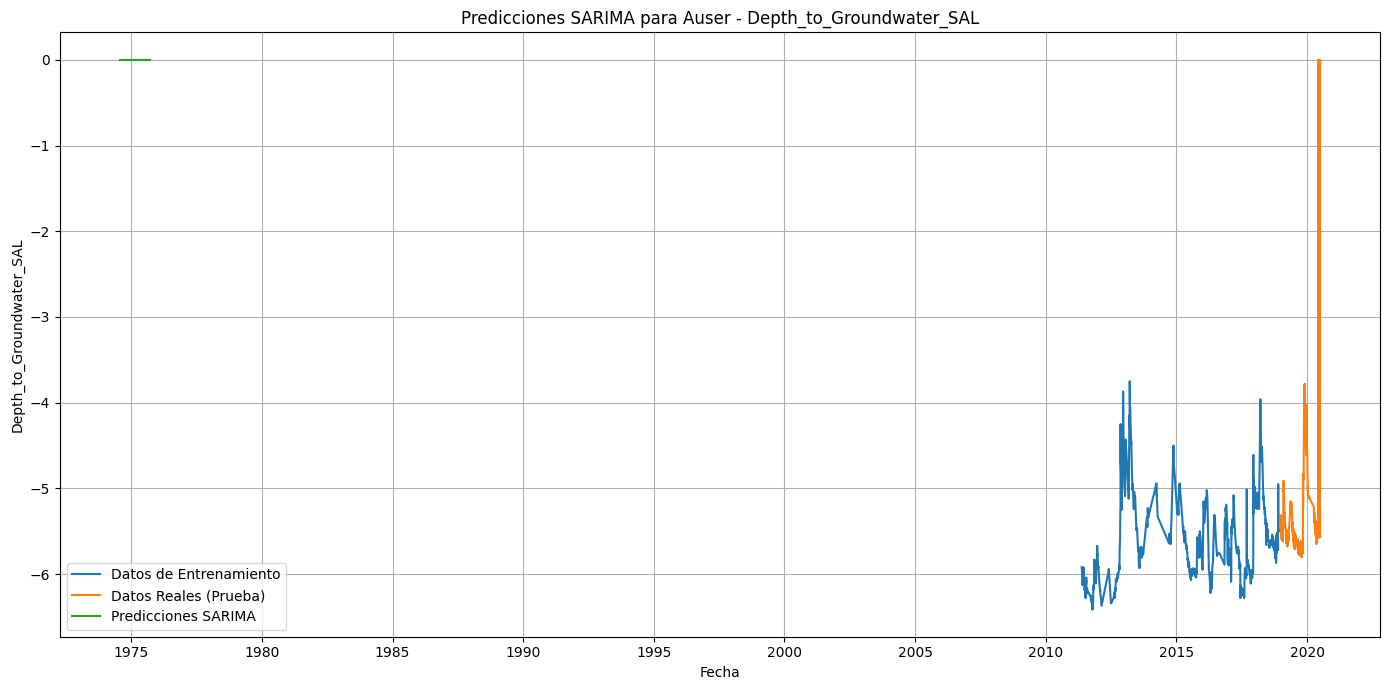


--- Modelando con SARIMA para Auser - Columna: Depth_to_Groundwater_PAG ---


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

SARIMA RMSE para Depth_to_Groundwater_PAG: 2.0835


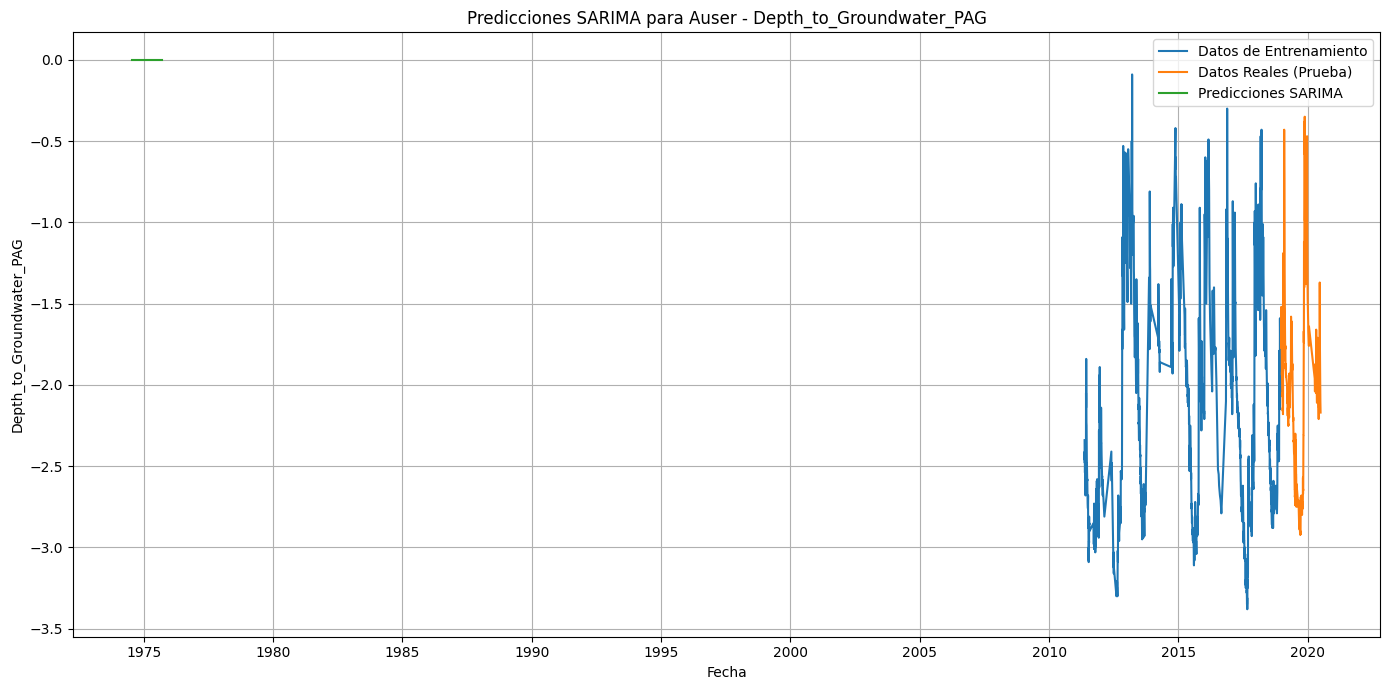


--- Modelando con SARIMA para Auser - Columna: Depth_to_Groundwater_CoS ---
SARIMA RMSE para Depth_to_Groundwater_CoS: 5.9723


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

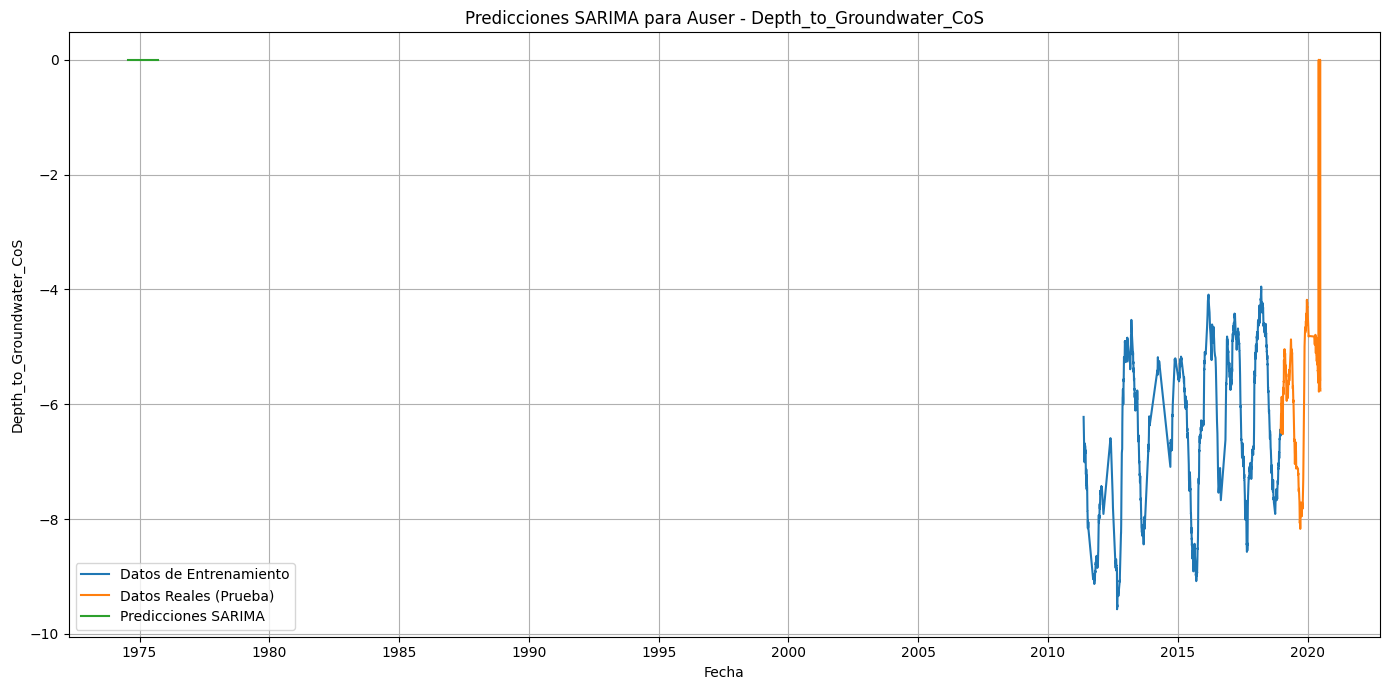


--- Modelando con SARIMA para Auser - Columna: Depth_to_Groundwater_DIEC ---
SARIMA RMSE para Depth_to_Groundwater_DIEC: 4.0777


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

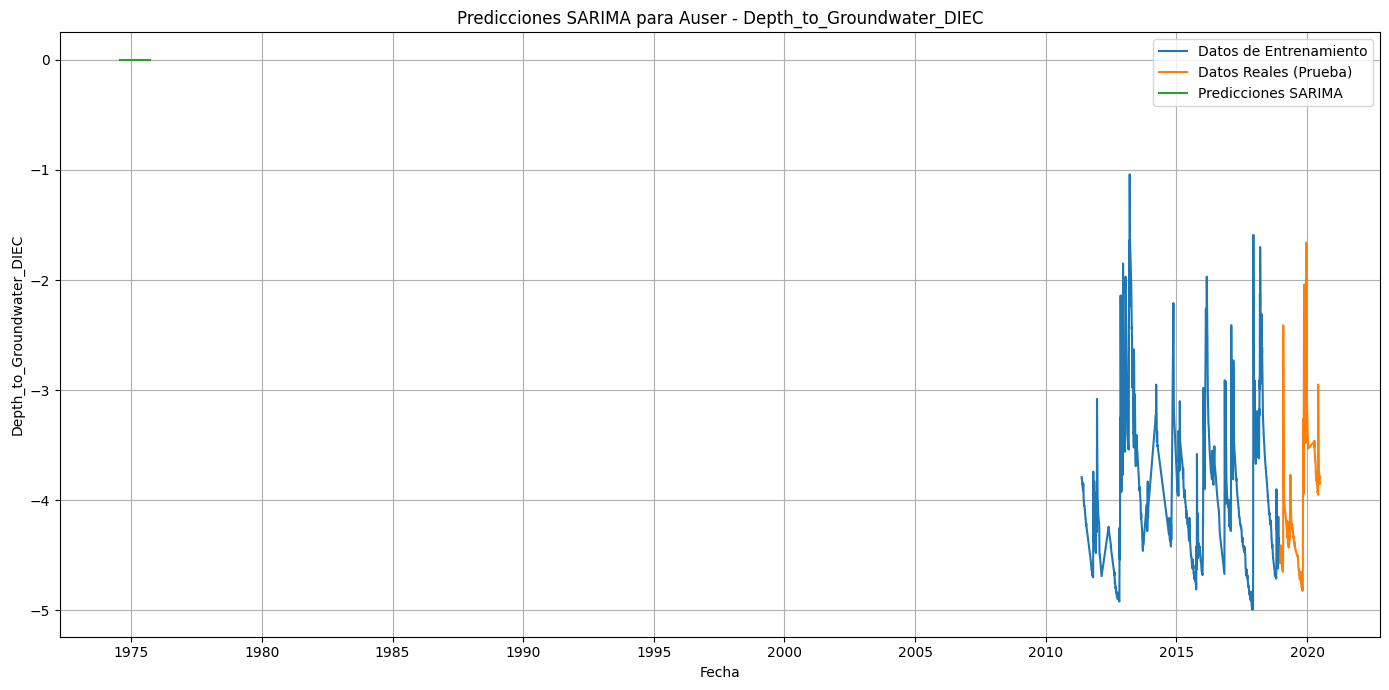


--- Modelando con SARIMA para Auser - Columna: Depth_to_Groundwater_LT2 ---


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

SARIMA RMSE para Depth_to_Groundwater_LT2: 12.7119


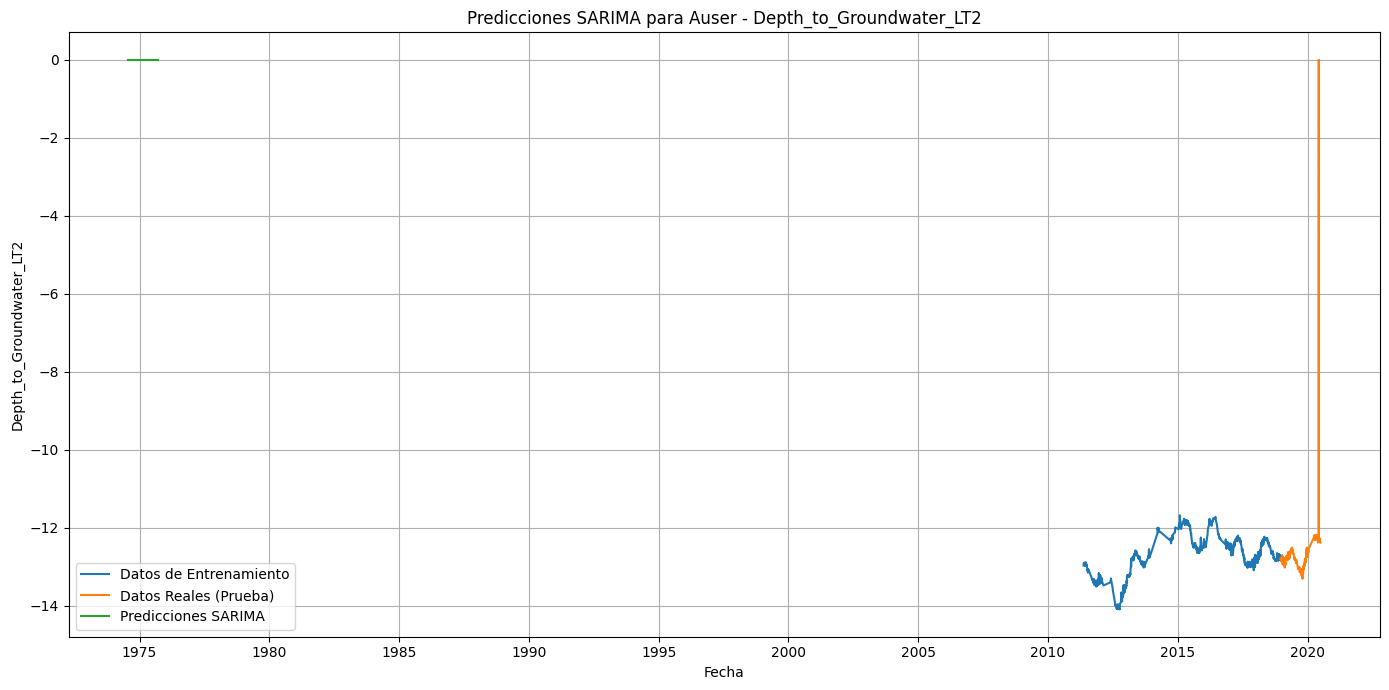


--- Modelando con SARIMA para Doganella - Columna: Depth_to_Groundwater_Pozzo_1 ---
SARIMA RMSE para Depth_to_Groundwater_Pozzo_1: 2.9904


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

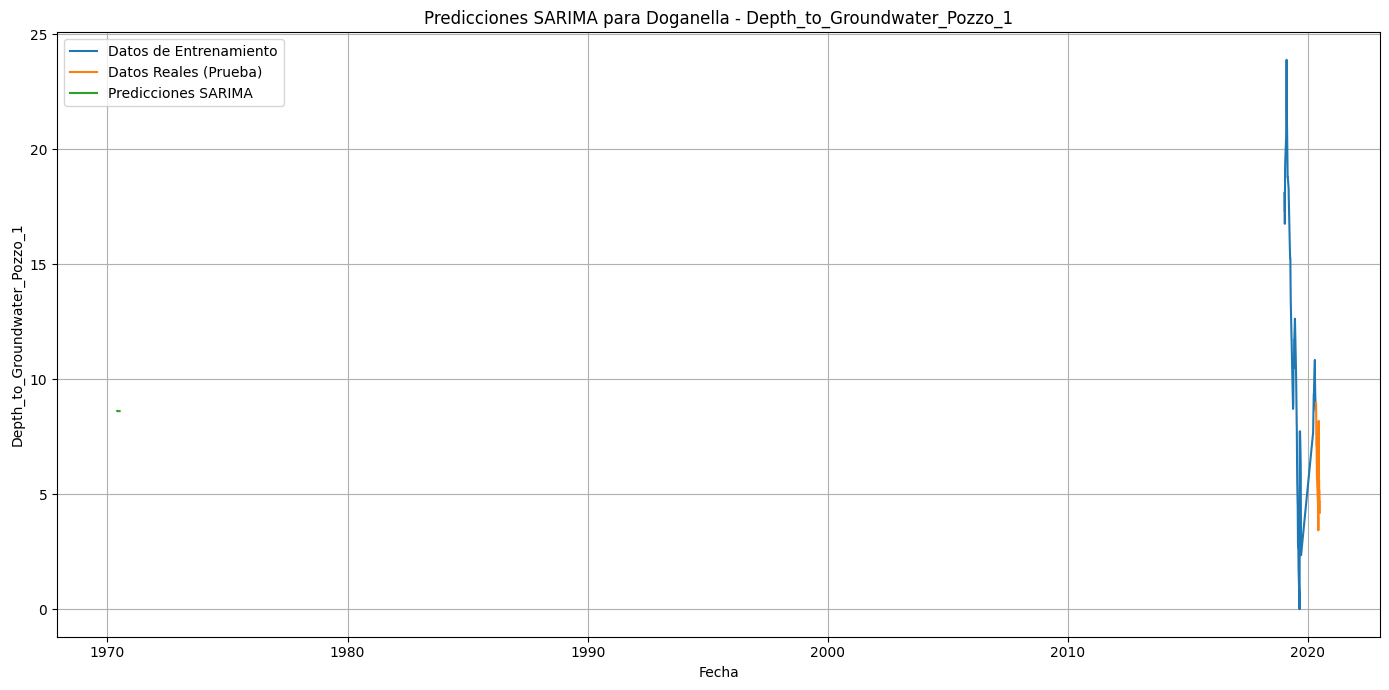


--- Modelando con SARIMA para Doganella - Columna: Depth_to_Groundwater_Pozzo_2 ---
SARIMA RMSE para Depth_to_Groundwater_Pozzo_2: 0.3617


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

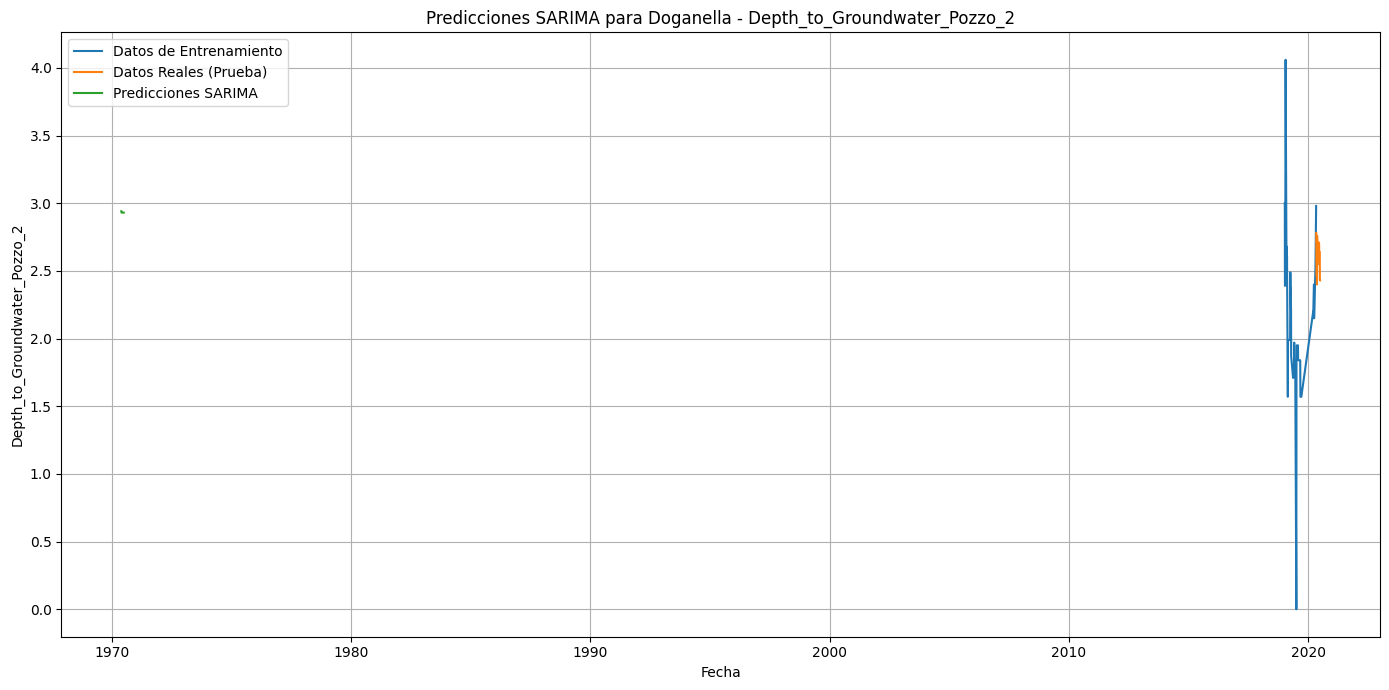


--- Modelando con SARIMA para Doganella - Columna: Depth_to_Groundwater_Pozzo_3 ---
SARIMA RMSE para Depth_to_Groundwater_Pozzo_3: 10.4123


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

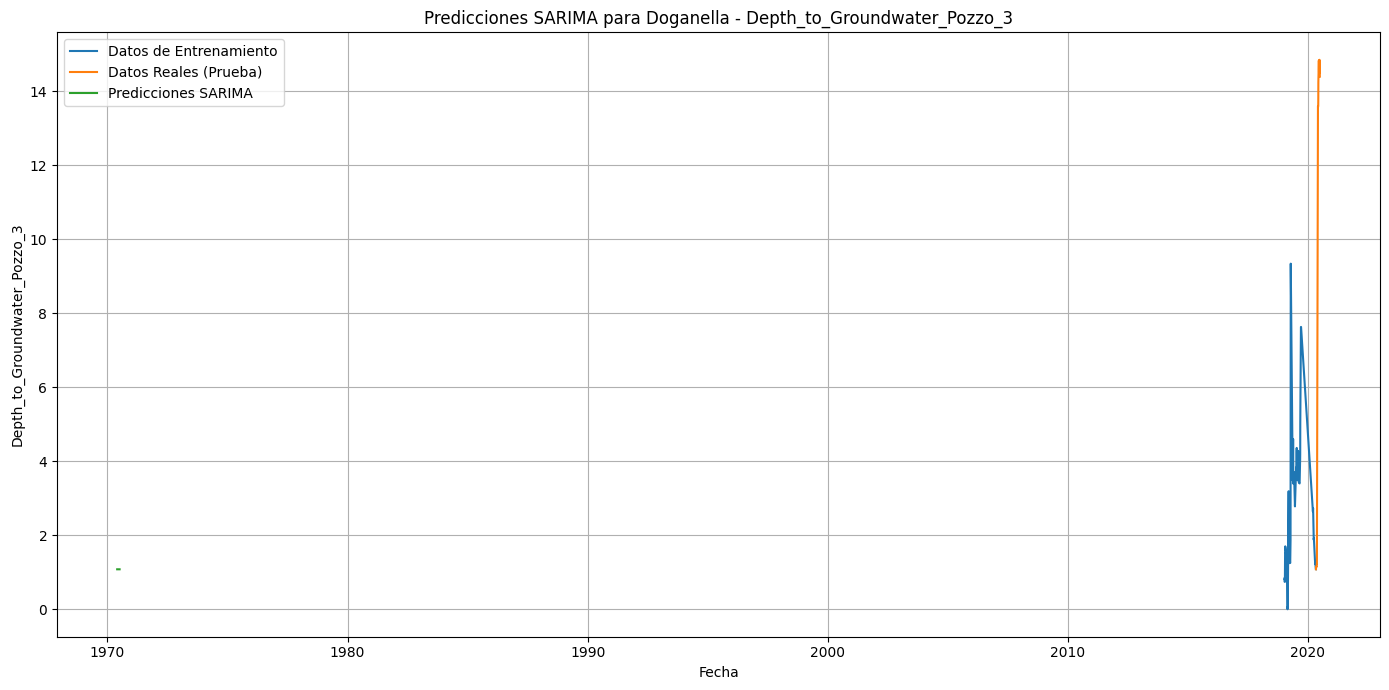


--- Modelando con SARIMA para Doganella - Columna: Depth_to_Groundwater_Pozzo_4 ---
SARIMA RMSE para Depth_to_Groundwater_Pozzo_4: 0.4725


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

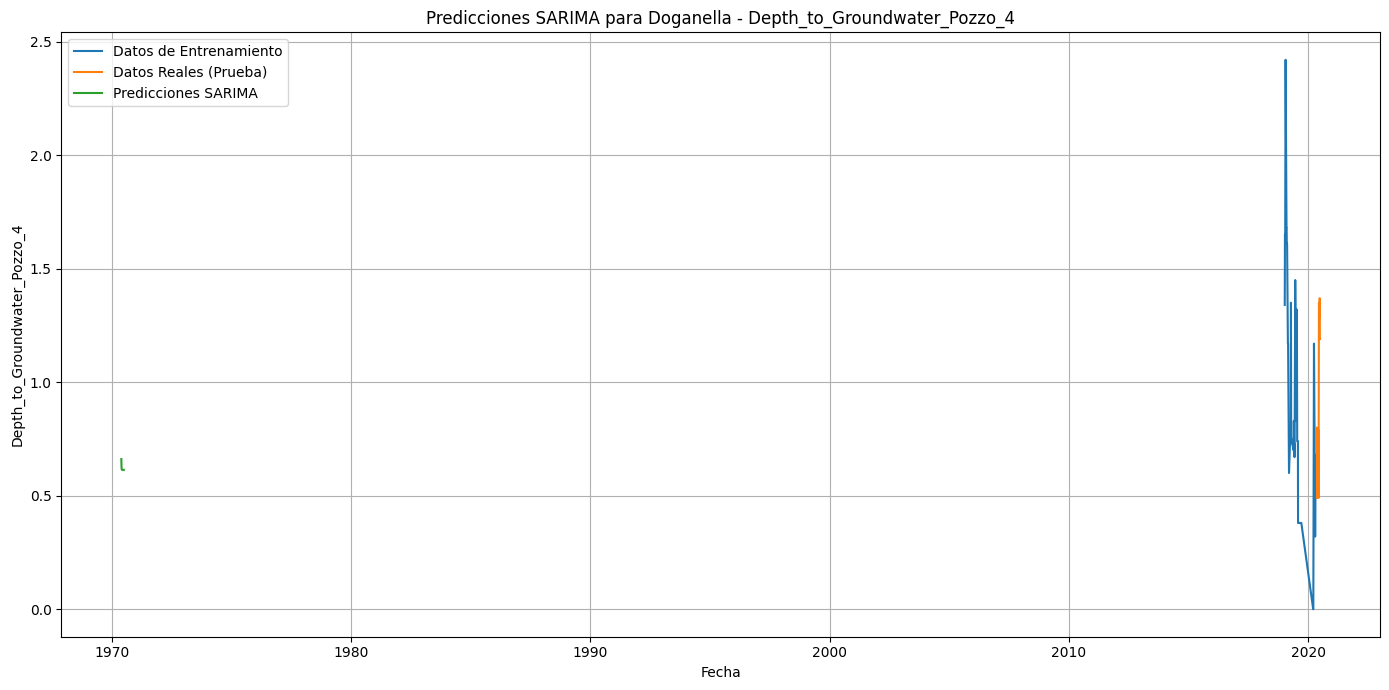


--- Modelando con SARIMA para Doganella - Columna: Depth_to_Groundwater_Pozzo_5 ---
SARIMA RMSE para Depth_to_Groundwater_Pozzo_5: 0.0824


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

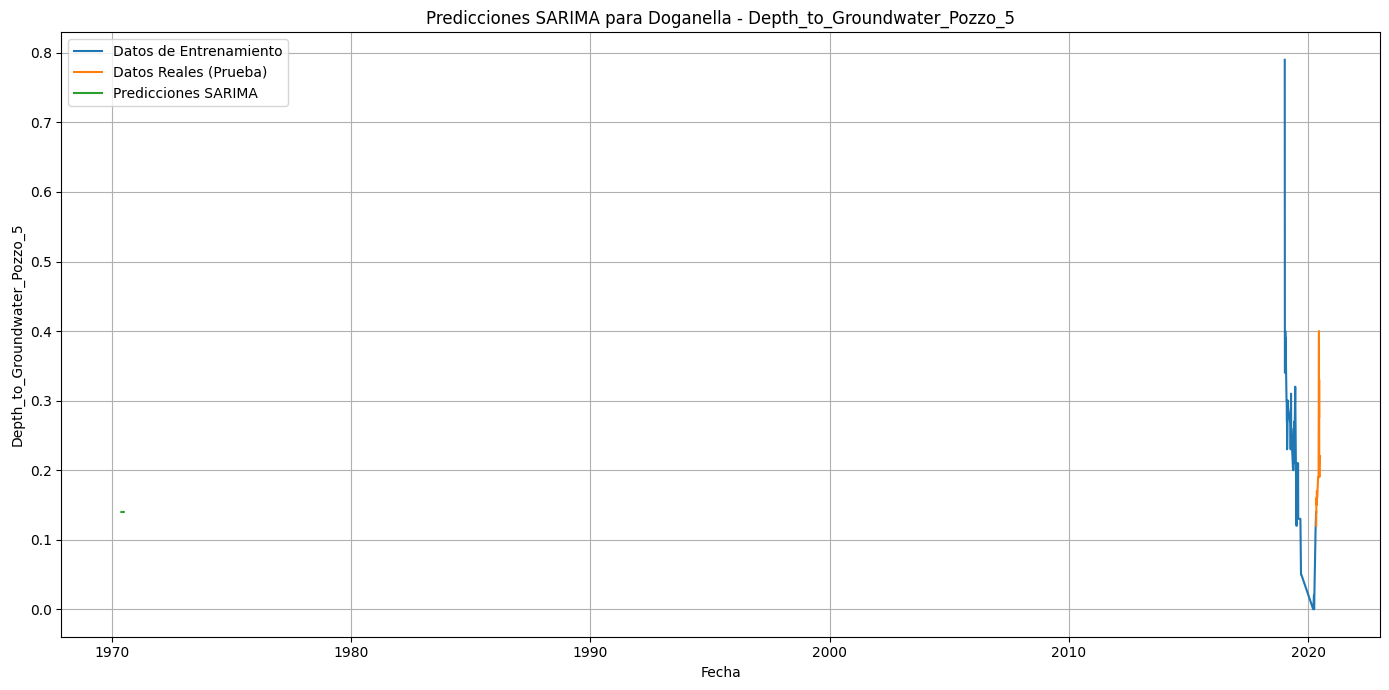


--- Modelando con SARIMA para Doganella - Columna: Depth_to_Groundwater_Pozzo_6 ---
SARIMA RMSE para Depth_to_Groundwater_Pozzo_6: 0.4886


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

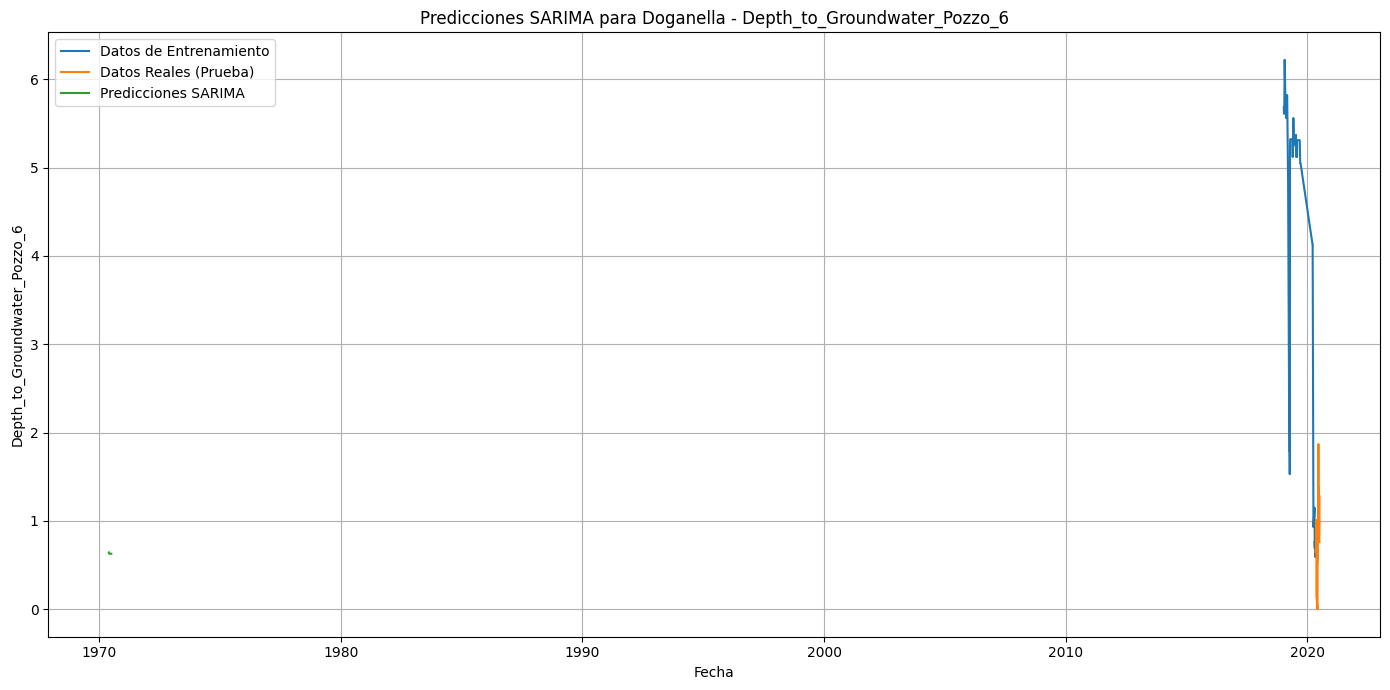


--- Modelando con SARIMA para Doganella - Columna: Depth_to_Groundwater_Pozzo_7 ---
SARIMA RMSE para Depth_to_Groundwater_Pozzo_7: 0.4967


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

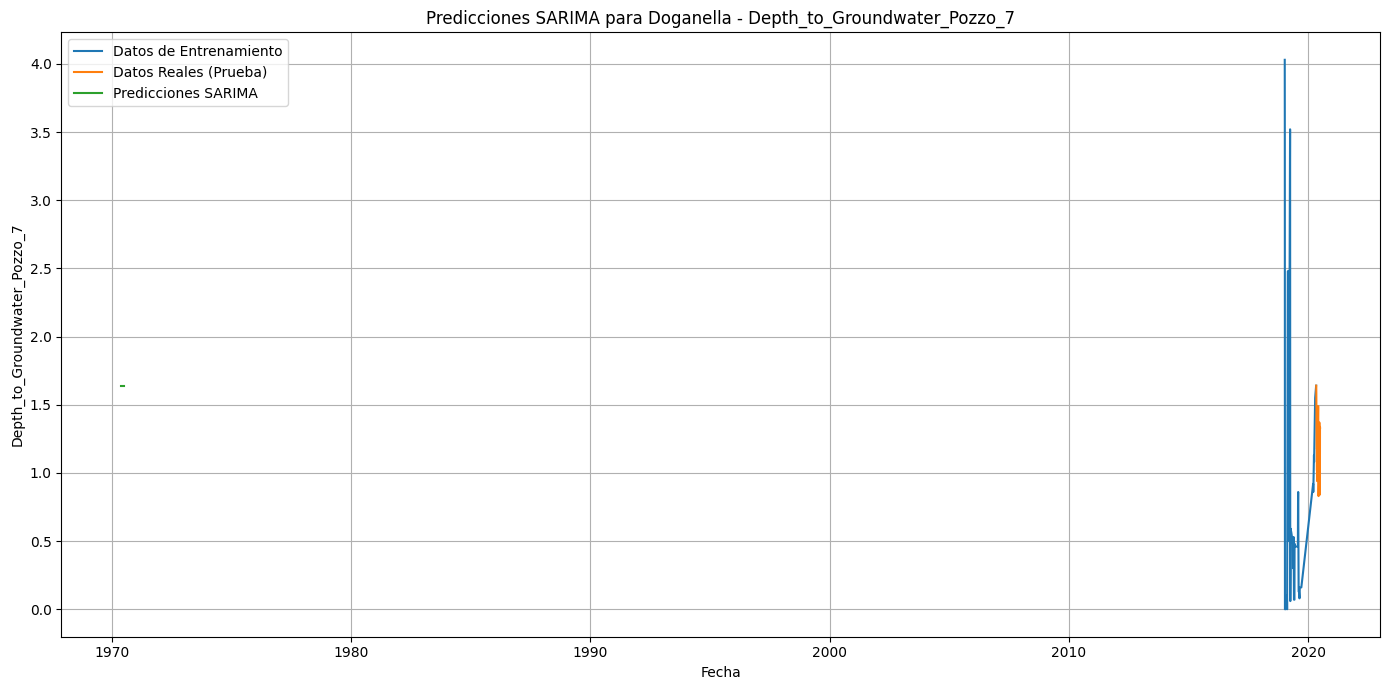


--- Modelando con SARIMA para Doganella - Columna: Depth_to_Groundwater_Pozzo_8 ---
SARIMA RMSE para Depth_to_Groundwater_Pozzo_8: 0.6274


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

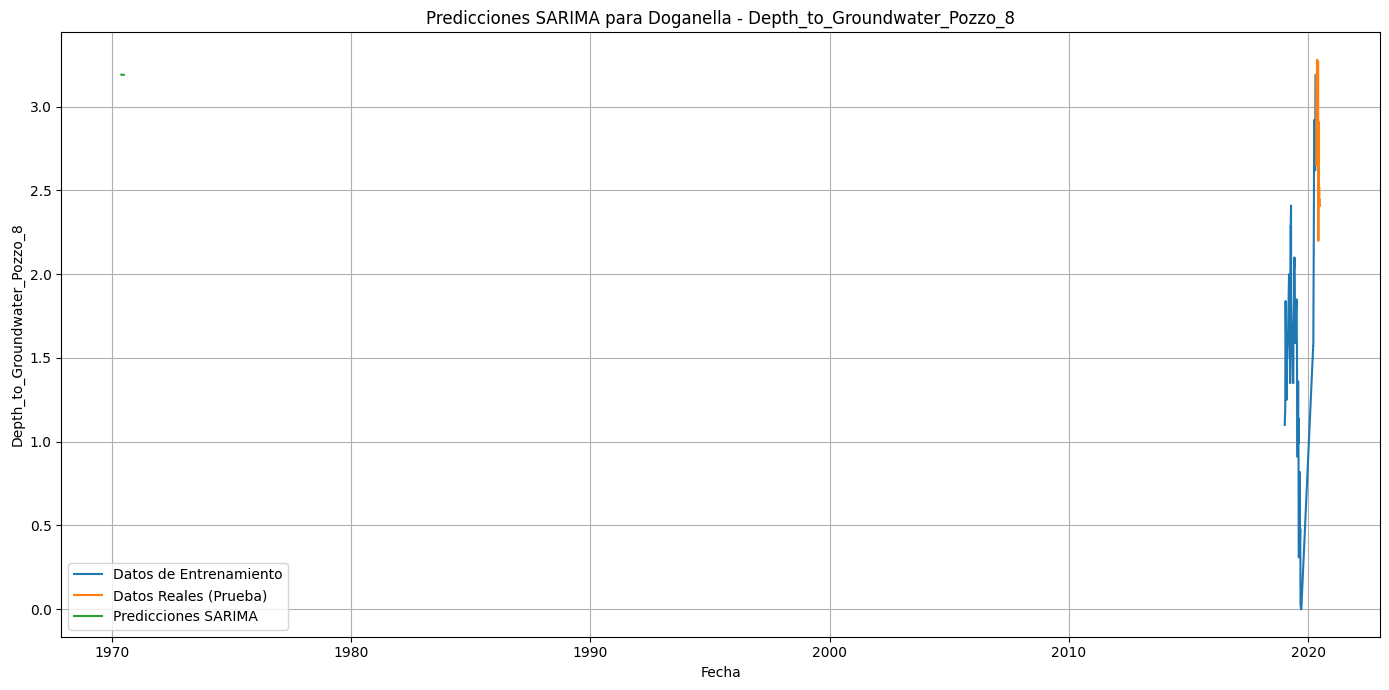


--- Modelando con SARIMA para Doganella - Columna: Volume_Pozzo_1 ---
SARIMA RMSE para Volume_Pozzo_1: 726.3844


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

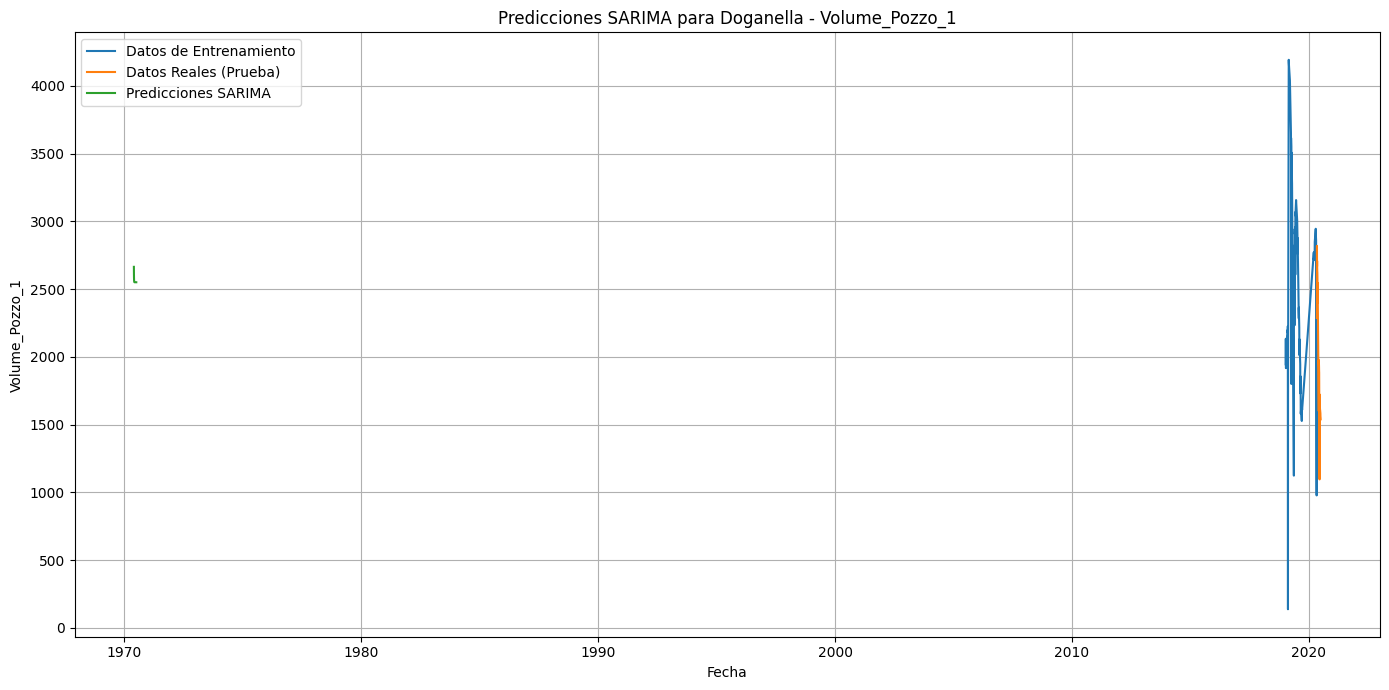


--- Modelando con SARIMA para Doganella - Columna: Volume_Pozzo_3 ---
SARIMA RMSE para Volume_Pozzo_3: 559.9226


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

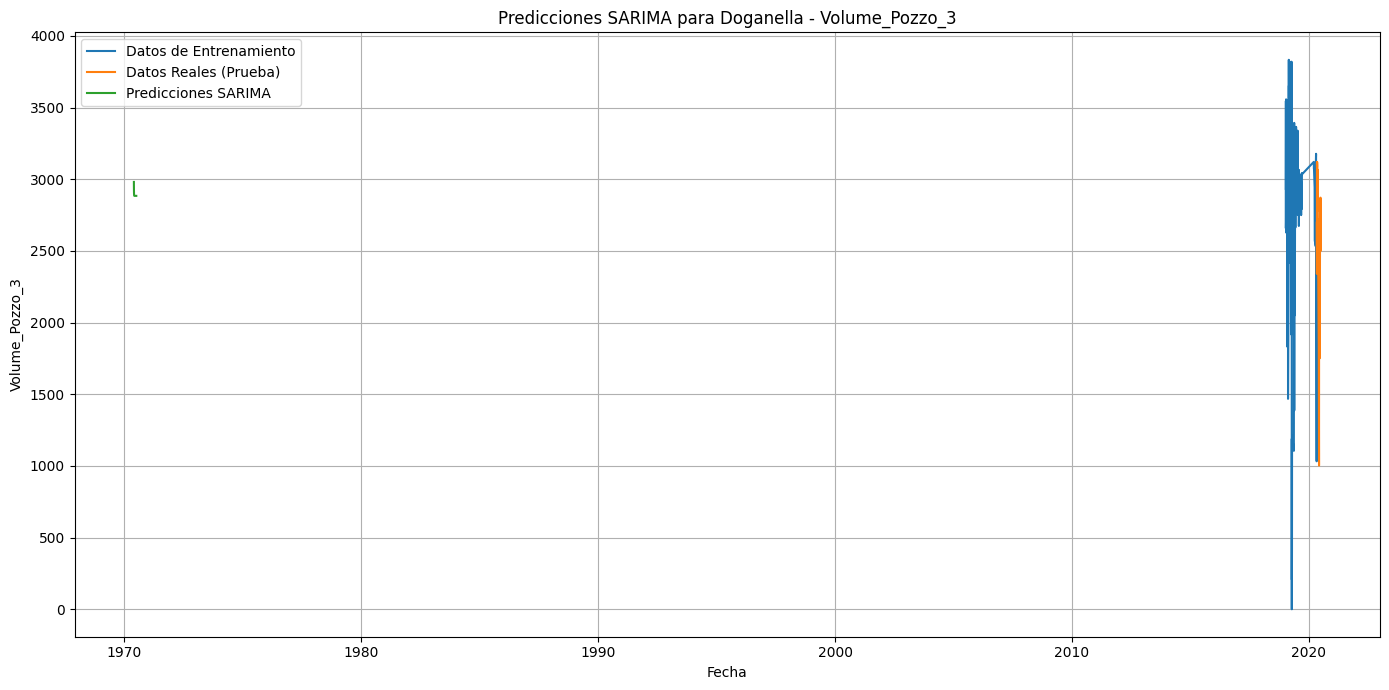


--- Modelando con SARIMA para Doganella - Columna: Volume_Pozzo_4 ---
SARIMA RMSE para Volume_Pozzo_4: 222.2366


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

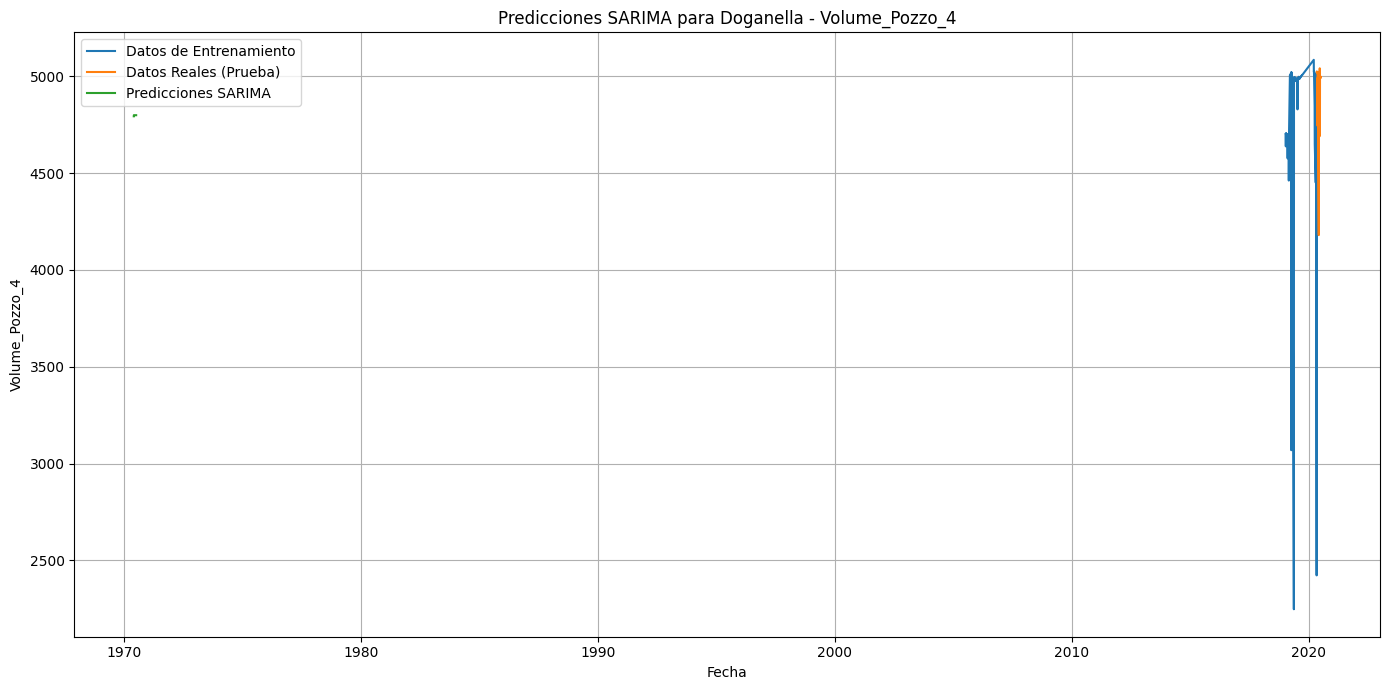


--- Modelando con SARIMA para Luco - Columna: Depth_to_Groundwater_Pozzo_1 ---
SARIMA RMSE para Depth_to_Groundwater_Pozzo_1: 0.1742


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

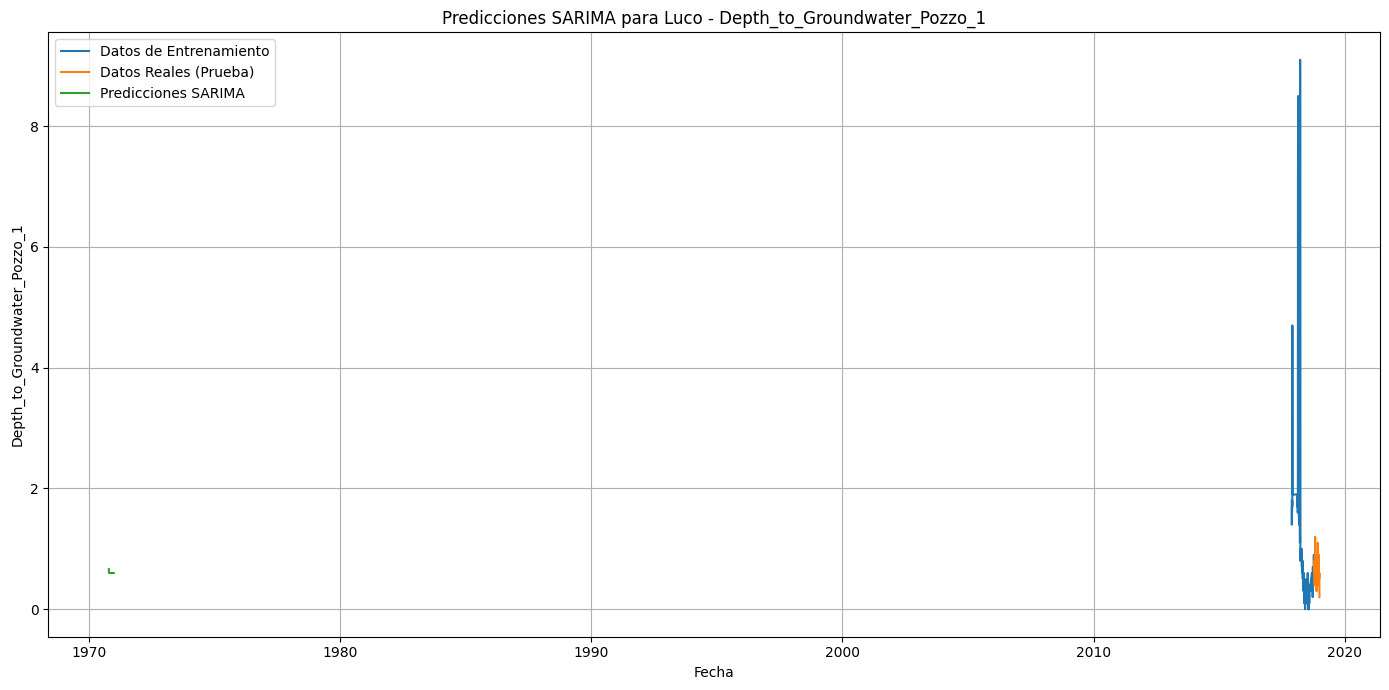


--- Modelando con SARIMA para Luco - Columna: Depth_to_Groundwater_Pozzo_3 ---
SARIMA RMSE para Depth_to_Groundwater_Pozzo_3: 0.3367


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

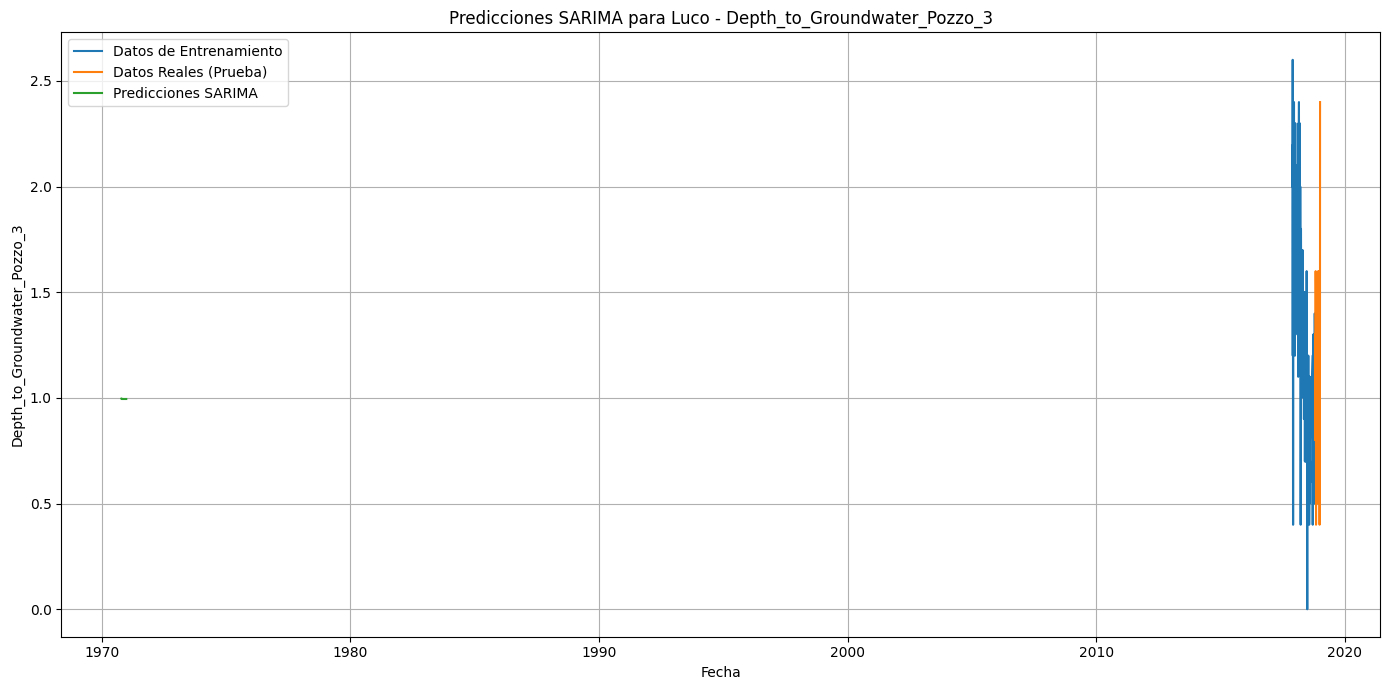


--- Modelando con SARIMA para Luco - Columna: Depth_to_Groundwater_Pozzo_4 ---
SARIMA RMSE para Depth_to_Groundwater_Pozzo_4: 3.2240


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

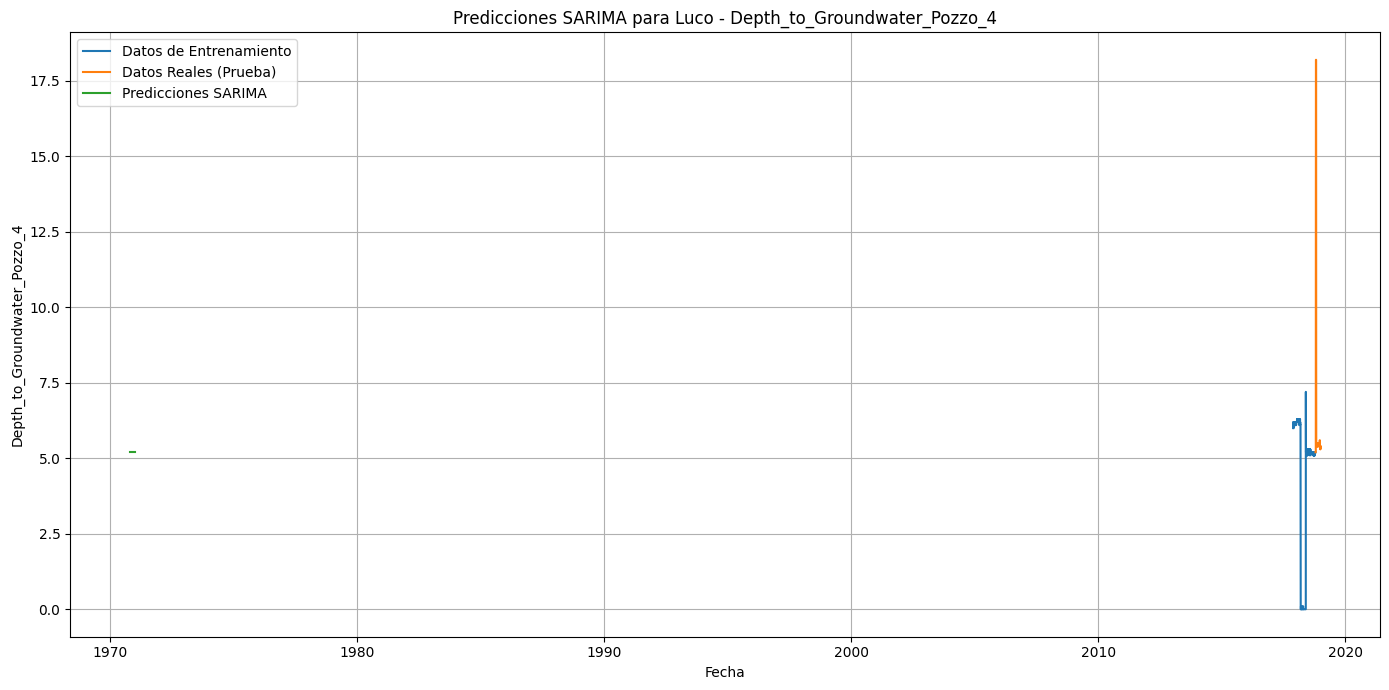


--- Modelando con SARIMA para Petrignano - Columna: Depth_to_Groundwater_P24 ---


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

SARIMA RMSE para Depth_to_Groundwater_P24: 1.2467


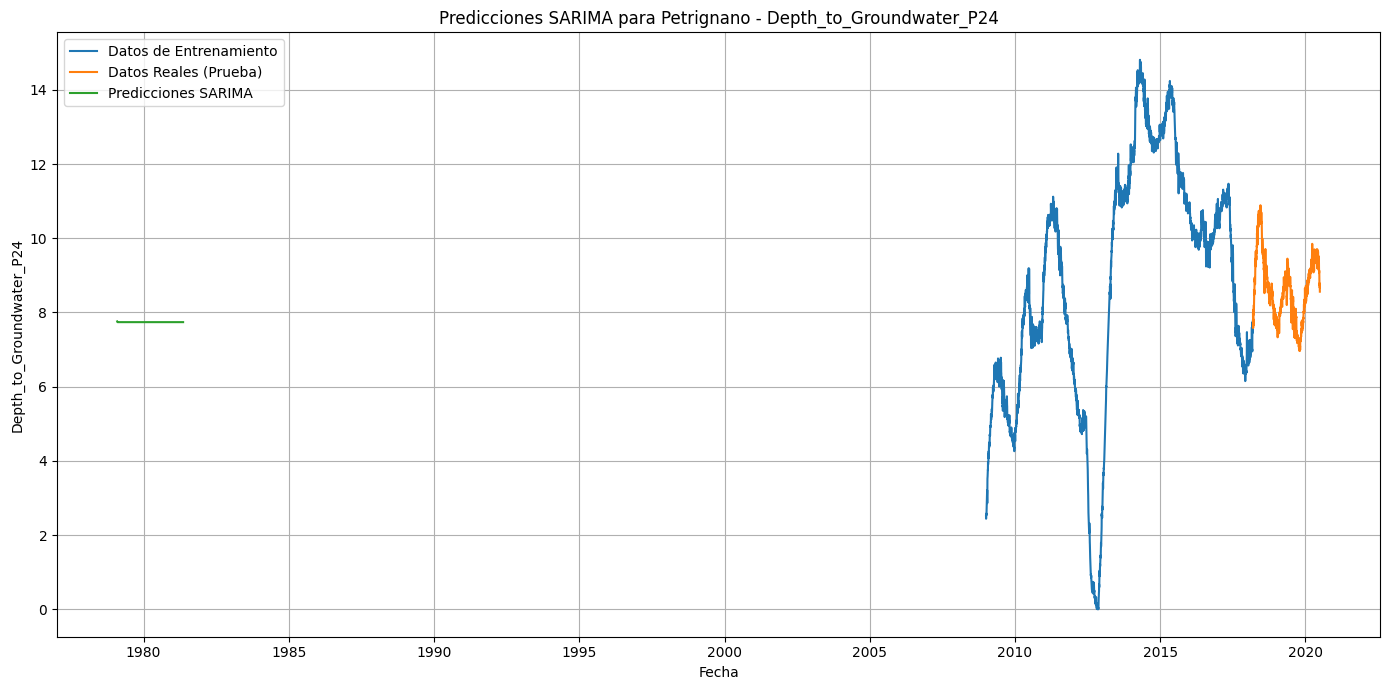


--- Modelando con SARIMA para Petrignano - Columna: Depth_to_Groundwater_P25 ---
SARIMA RMSE para Depth_to_Groundwater_P25: 1.3211


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

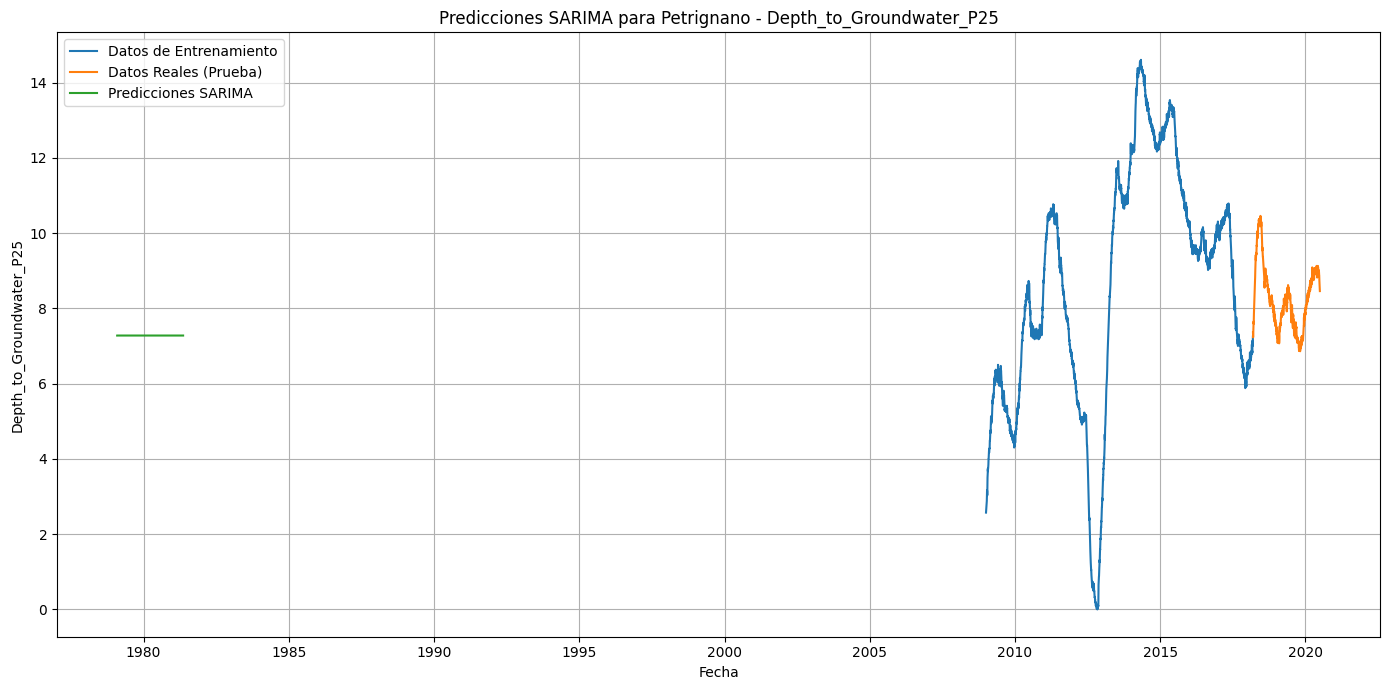


--- Modelando con SARIMA para Petrignano - Columna: Volume_C10_Petrignano ---
SARIMA RMSE para Volume_C10_Petrignano: 5335.1023


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

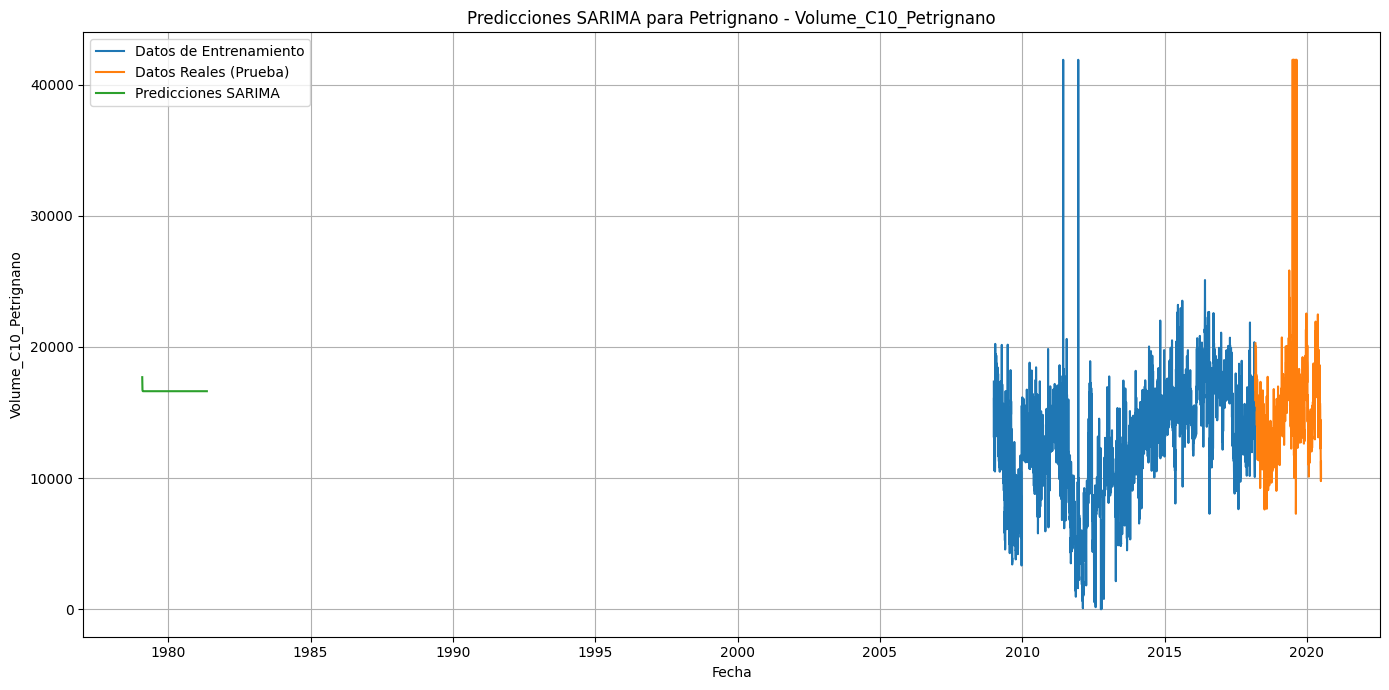

Advertencia: La columna objetivo 'Volume_Bilancino' no se encuentra o está vacía en 'Bilancino'. Saltando.

--- Modelando con SARIMA para Arno - Columna: Hydrometry_Nave_di_Rosano ---
SARIMA RMSE para Hydrometry_Nave_di_Rosano: 0.4343


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

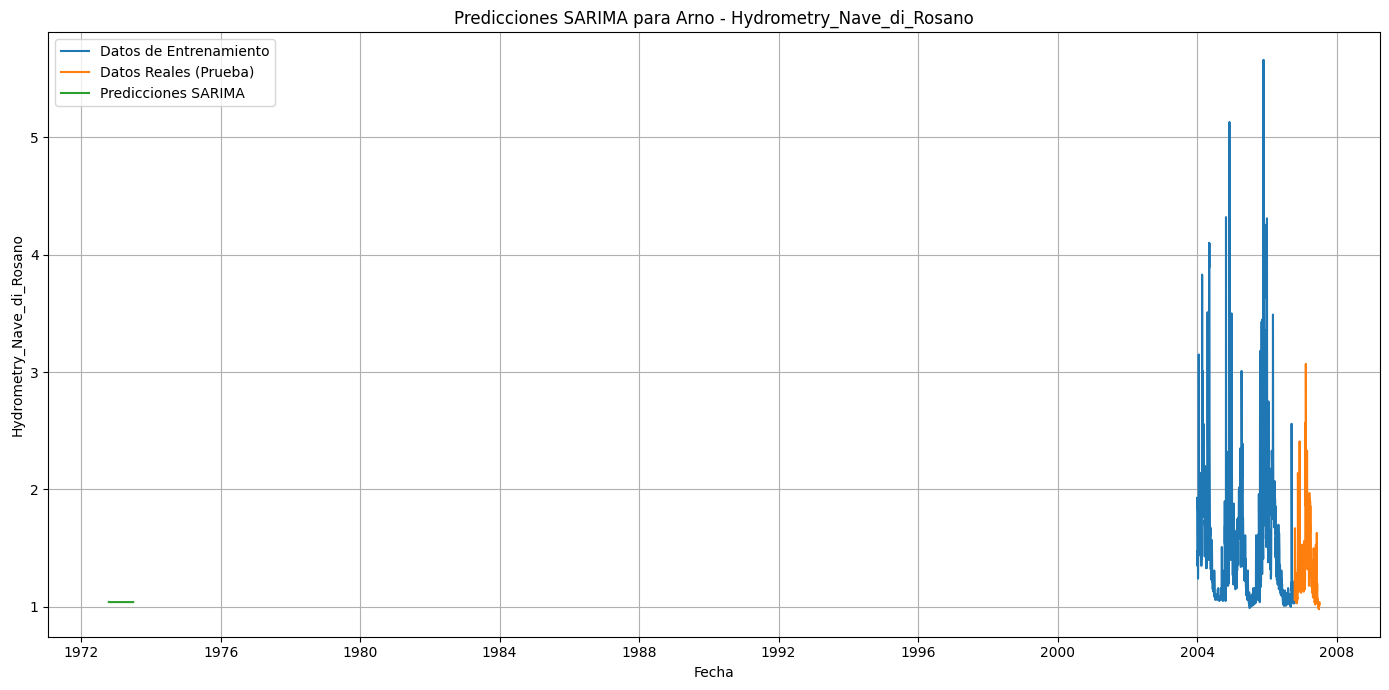


--- Modelando con SARIMA para Amiata - Columna: Flow_Rate_Ermicciolo ---
SARIMA RMSE para Flow_Rate_Ermicciolo: 2.9582


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

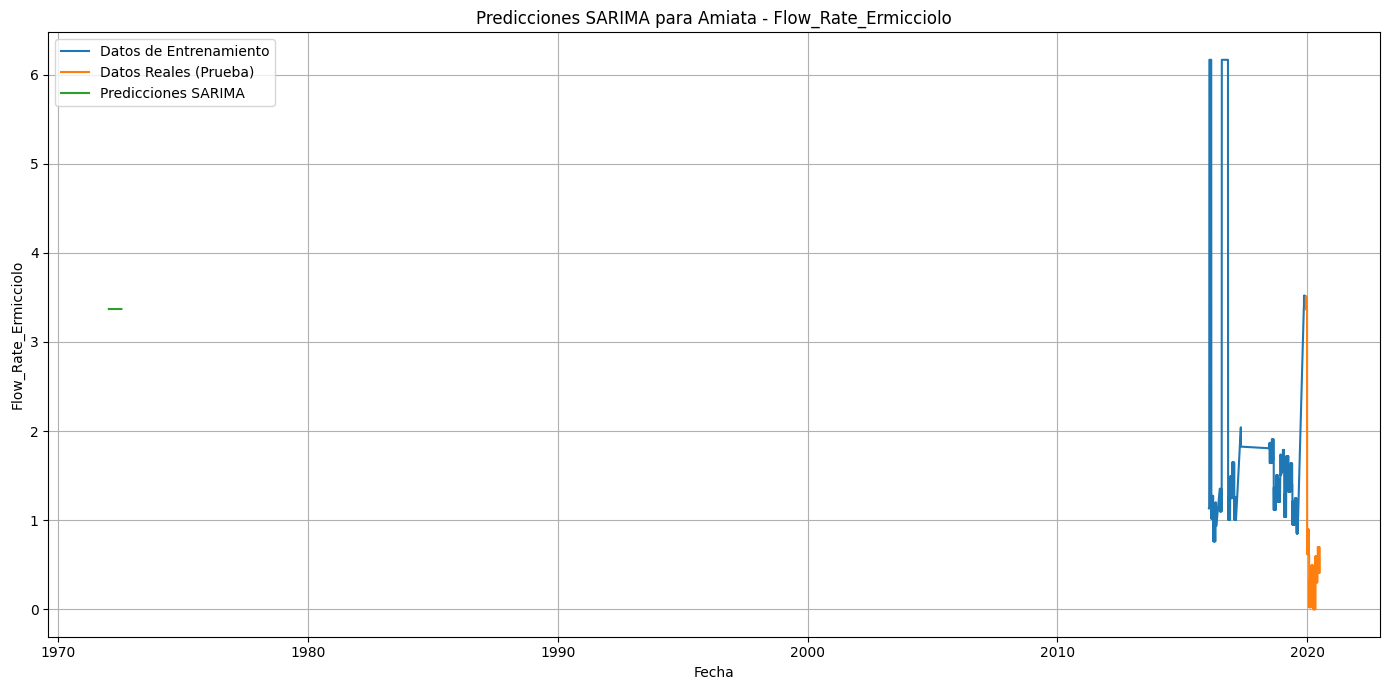


--- Modelando con SARIMA para Amiata - Columna: Flow_Rate_Arbure ---
SARIMA RMSE para Flow_Rate_Arbure: 0.2387


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

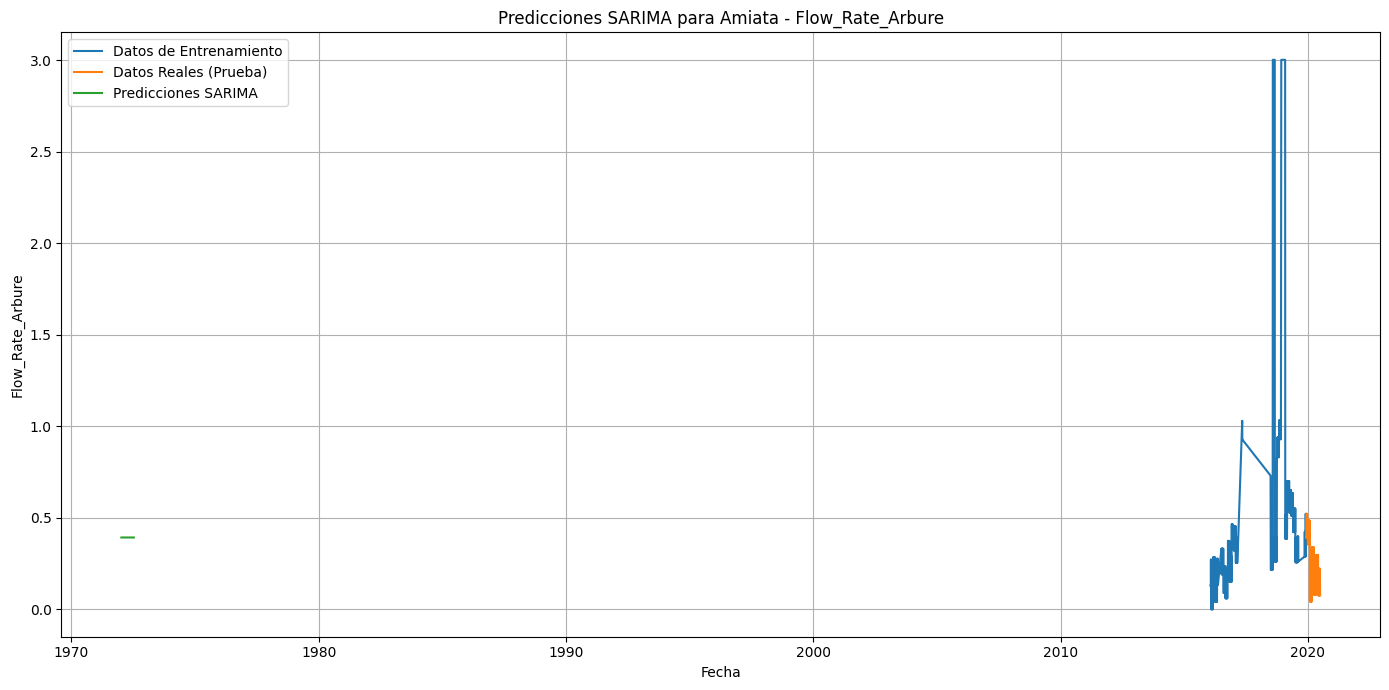


--- Modelando con SARIMA para Amiata - Columna: Flow_Rate_Bugnano ---
SARIMA RMSE para Flow_Rate_Bugnano: 0.0176


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

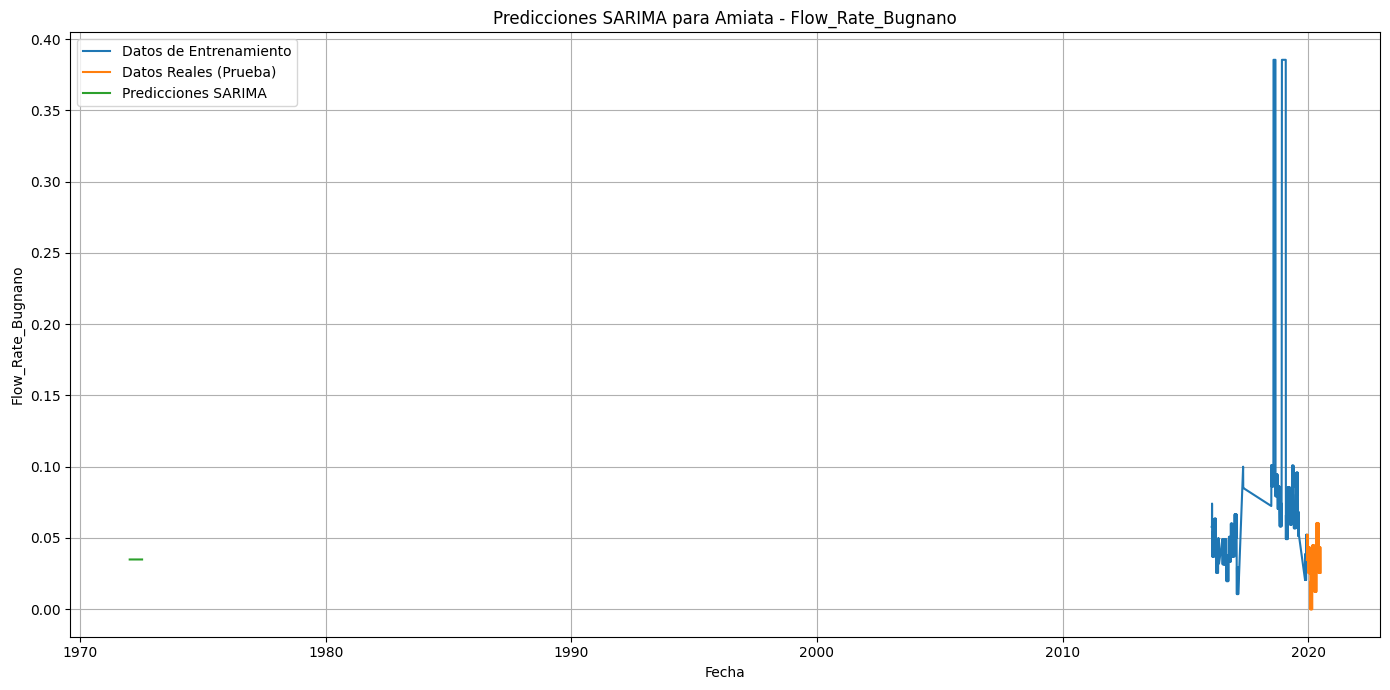


--- Modelando con SARIMA para Amiata - Columna: Flow_Rate_Galleria_Alta ---
SARIMA RMSE para Flow_Rate_Galleria_Alta: 1.2845


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

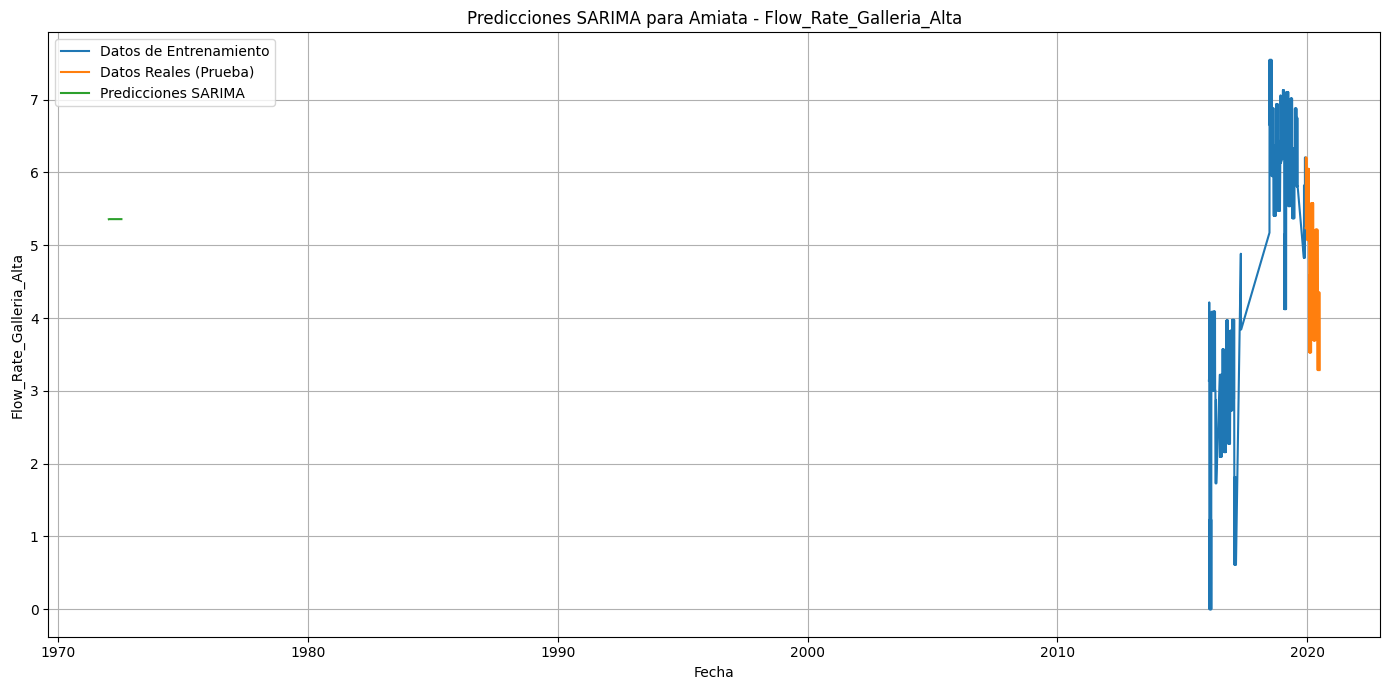


--- Modelando con SARIMA para Lupa - Columna: Flow_Rate_Lupa ---
SARIMA RMSE para Flow_Rate_Lupa: 8.2899


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

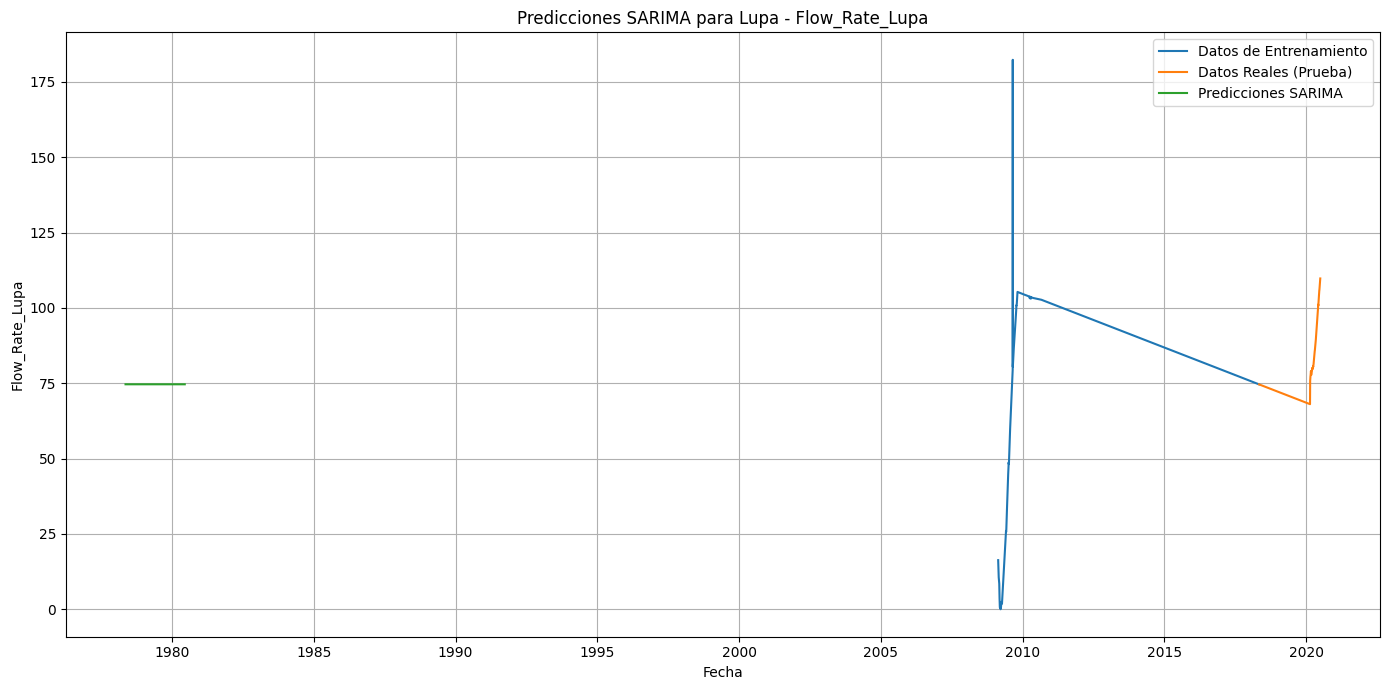


--- Modelando con SARIMA para Madonna_di_Canneto - Columna: Flow_Rate_Madonna_di_Canneto ---
SARIMA RMSE para Flow_Rate_Madonna_di_Canneto: 19.4275


/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sytic/miniconda3/envs/data-science/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

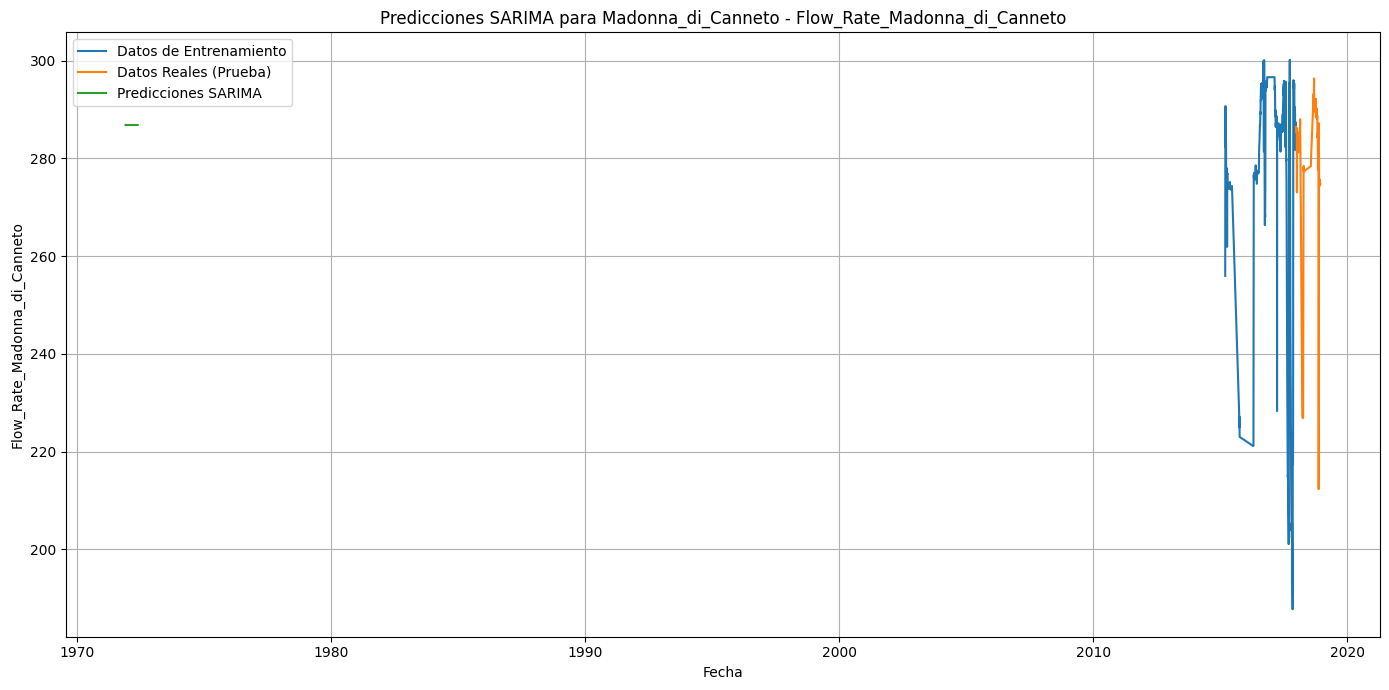


Resumen de Resultados Finales

Resultados para Auser:
  Depth_to_Groundwater_SAL_SARIMA_RMSE: 5.2806
  Depth_to_Groundwater_PAG_SARIMA_RMSE: 2.0835
  Depth_to_Groundwater_CoS_SARIMA_RMSE: 5.9723
  Depth_to_Groundwater_DIEC_SARIMA_RMSE: 4.0777
  Depth_to_Groundwater_LT2_SARIMA_RMSE: 12.7119

Resultados para Doganella:
  Depth_to_Groundwater_Pozzo_1_SARIMA_RMSE: 2.9904
  Depth_to_Groundwater_Pozzo_2_SARIMA_RMSE: 0.3617
  Depth_to_Groundwater_Pozzo_3_SARIMA_RMSE: 10.4123
  Depth_to_Groundwater_Pozzo_4_SARIMA_RMSE: 0.4725
  Depth_to_Groundwater_Pozzo_5_SARIMA_RMSE: 0.0824
  Depth_to_Groundwater_Pozzo_6_SARIMA_RMSE: 0.4886
  Depth_to_Groundwater_Pozzo_7_SARIMA_RMSE: 0.4967
  Depth_to_Groundwater_Pozzo_8_SARIMA_RMSE: 0.6274
  Volume_Pozzo_1_SARIMA_RMSE: 726.3844
  Volume_Pozzo_3_SARIMA_RMSE: 559.9226
  Volume_Pozzo_4_SARIMA_RMSE: 222.2366

Resultados para Luco:
  Depth_to_Groundwater_Pozzo_1_SARIMA_RMSE: 0.1742
  Depth_to_Groundwater_Pozzo_3_SARIMA_RMSE: 0.3367
  Depth_to_Groundwater_Pozzo_

In [ ]:
def train_waterbody(df, waterbody_name, target_columns):
    """
    Entrena y evalúa un modelo SARIMA para un dataset dado
    y sus columnas objetivo. Visualiza los resultados.
    """
    results = {}
    
    for target_col in target_columns:
        # Verifica si la columna objetivo existe y tiene datos válidos
        if target_col not in df.columns or df[target_col].dropna().empty:
            print(f"Advertencia: La columna objetivo '{target_col}' no se encuentra o está vacía en '{waterbody_name}'. Saltando.")
            continue        
        
        print(f"\n--- Modelando con SARIMA para {waterbody_name} - Columna: {target_col} ---")
        
        df_target = df[[target_col]].dropna()

        # División en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
        train_size = int(len(df_target) * 0.8)
        train_data, test_data = df_target.iloc[:train_size], df_target.iloc[train_size:]
        
        # Inicialización y ajuste del modelo SARIMA
        # Parámetros (1, 1, 1) para las partes no estacionales (AR, I, MA)
        # Parámetros (0, 0, 0, 0) para las partes estacionales (sin estacionalidad en este ejemplo inicial)
        # `enforce_stationarity` y `enforce_invertibility` en False para mayor flexibilidad
        sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0), 
                               enforce_stationarity=False, enforce_invertibility=False)
        sarima_results = sarima_model.fit(disp=False) # disp=False para suprimir la salida del proceso de ajuste
        
        # Generar predicciones para el conjunto de prueba
        sarima_predictions = sarima_results.predict(start=len(train_data), end=len(df_target)-1)
        
        # Asegurarse de que las predicciones no sean negativas (ej. para volúmenes o flujos)
        sarima_predictions[sarima_predictions < 0] = 0 

        # Calcular el RMSE (Root Mean Squared Error) para evaluar el modelo
        sarima_rmse = np.sqrt(mean_squared_error(test_data, sarima_predictions))
        print(f"SARIMA RMSE para {target_col}: {sarima_rmse:.4f}")
        results[f"{target_col}_SARIMA_RMSE"] = sarima_rmse

        # Visualizar predicciones SARIMA
        plt.figure(figsize=(8, 5))
        plt.plot(train_data.index, train_data, label='Datos de Entrenamiento')
        plt.plot(test_data.index, test_data, label='Datos Reales (Prueba)')
        plt.plot(sarima_predictions.index, sarima_predictions, label='Predicciones SARIMA')
        plt.title(f'Predicciones SARIMA para {waterbody_name} - {target_col}')
        plt.xlabel('Fecha')
        plt.ylabel(target_col)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
            
    return results

target_variables = {
    'Auser': ['Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_LT2'],
    'Petrignano': ['Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25'],
    'Doganella': [
        'Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_2', 
        'Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4', 
        'Depth_to_Groundwater_Pozzo_5', 'Depth_to_Groundwater_Pozzo_6', 
        'Depth_to_Groundwater_Pozzo_7', 'Depth_to_Groundwater_Pozzo_8', 
        'Depth_to_Groundwater_Pozzo_9'
    ],
    'Luco': ['Depth_to_Groundwater_Podere_Casetta'],
    'Amiata': ['Flow_Rate_Bugnano', 'Flow_Rate_Arbure', 'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta'],
    'Madonna_di_Canneto': ['Flow_Rate_Madonna_di_Canneto'],
    'Lupa': ['Flow_Rate_Lupa'],
    'Arno': ['Hydrometry_Nave_di_Rosano'],
    'Bilancino': ['Lake_Level', 'Flow_Rate'],
}


overall_results = {}
for name, df in processed_datasets.items():
    if name in target_variables:
        current_waterbody_results = train_waterbody(df, name, target_variables[name])
        overall_results[name] = current_waterbody_results
    else:
        print(f"\nAdvertencia: No se encontraron columnas objetivo para el dataset '{name}'. Saltando modelado.")

print("\nResumen de Resultados Finales")
for waterbody, results in overall_results.items():
    print(f"\nResultados para {waterbody}:")
    if results:
        for metric, value in results.items():
            if not pd.isna(value):
                print(f"  {metric}: {value:.4f}")
            else:
                print(f"  {metric}: N/A (Columna objetivo no encontrada o vacía)")
    else:
        print("  No hay resultados de modelado disponibles.")